# Analysis of the Education System data set for the international expansion of the Academy Company

### We are working for an EdTech start-up called Academy, which offers online training content for high school and university level audiences. Mark, the manager, proposed a first exploratory analysis mission to determine whether the education data from the World Bank can inform the expansion of the project. The meeting led to three main questions:

#### 1. Which countries have potential clients for our services?
#### 2. To each of these countries, how will potential clients evolve?
#### 3. In which countries should operate the company?

In order to carry out the mission, we extracted the data from the following link: https://datacatalog.worldbank.org/search/dataset/0038480

There are several files in the data set and we will look at them one by one as shown below.

# Content
- [Pre-exploratory stage: General analysis and discovery of the files](#Pre-exploratory-stage:-General-analysis-and-discovery-of-the-files)
- [Selection of possible indicators](#Selection-of-possible-indicators)
- [Analysis of the data quality of the selected indicators](#Analysis-of-the-data-quality-of-the-selected-indicators)
- [Revision of the selected indicators for relevant years](#Revision-of-the-selected-indicators-for-relevant-years)
- [Analysis of the data available for the selected indicators and relevant years](#Analysis-of-the-data-available-for-the-selected-indicators-and-relevant-years)

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

# Use seaborn style defaults and set the default figure size
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

import textwrap

import pycountry

import itertools

## Pre-exploratory stage: General analysis and discovery of the files

**We will charge one by one the files that are in the database to explore and discover them.**

### First data file: EdStatsCountry-Series.csv

In [2]:
ed_stats_country_series = pd.read_csv('EdStatsCountry-Series.csv')
ed_stats_country_series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [3]:
ed_stats_country_series.shape

(613, 4)

From the first file we observe that there are four columns with categorical variables. Two of these variables are related to the method used to obtain the data and the series code for each indicator, as we see from the columns "DESCRIPTION" and "SeriesCode".  

The file has 613 rows and 4 columns.

### Second data file: EdStatsCountry.csv

In [4]:
ed_stats_country = pd.read_csv('EdStatsCountry.csv')
ed_stats_country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [5]:
ed_stats_country.shape

(241, 32)

From the second file we observe that there are 241 rows and 32 columns with information about the countries, such as country name, country code (in Alpha2 and Alpha3 conventions), currency unit, etc.

### Third data file: EdStatsData.csv

In [6]:
ed_stats_data = pd.read_csv('EdStatsData.csv')
ed_stats_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
ed_stats_data.shape

(886930, 70)

**The third data file contains 886930 rows and 70 columns with all the indicators for every country, including the codes for such countries and indicators. Columns are also designated to the years. We will come back to this file later.**


### Fourth data file: EdStatsFootNote.csv

In [8]:
ed_stats_foot_note = pd.read_csv('EdStatsFootNote.csv')
ed_stats_foot_note.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [9]:
ed_stats_foot_note.shape

(643638, 5)

The fourth data file contains 643638 rows and 5 columns. This file contains supplementary information about the data source.

### Fifth data file: EdStatsSeries.csv

In [10]:
ed_stats_series = pd.read_csv('EdStatsSeries.csv')
ed_stats_series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
ed_stats_series.shape

(3665, 21)

**The fifth data file contains 3665 rows and 21 columns with the explanation of all the indicators. It contains information about the indicators topics (column "Topic"), their long and short definitions, their corresponding codes (column "Series Code").**

## Selection of possible indicators

### Proposition of indicators

After going through all the data files and going back to the questions proposed in this project, we will try to relate such questions with some indicators in the data. For this, we will open the file named "EdStatsSeries.csv" to select the indicators that are of interest.

In [12]:
ed_stats_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

We will propose first some keywords to start the search. These are associated with the questions from the meeting: 

- **Demography** or total population in ages groups, 15-24 for instance. This is because these group might be part of the target clients. 

- **Internet** and **computer**, because the company service is an online education platform, and potential clientes will need computers and internet. 

- **High school** and **university**, because the platform content is aimed for high school and univertity level.

- **GDP** (Gross domestic product), also known as domestic product, is a macroeconomic magnitude that expresses the monetary value of the production of goods and services for final demand of a country or region during a given period, usually one year or quarterly. Our guess is that for emerging countries, GDP should be higher or increasing in time. This could be a good indicator for clients prospection.

- **Projections**, because we will try to answer how potential clients will evolve according to the projection models towards next years.

### Creation of a list of indicators

As we will need to store the indicators that are of interest, we will put them into a list.

In [13]:
list_indicators = []

One way to start the selection of indicators that are relevant to our mission, is by looking at the unique values of column "Topic". Then we will use only those values related to the specific indicator.

In [14]:
ed_stats_series['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

By looking at the "Topic" **Population** and by knowing the groups of ages that migh be of interest for us, we can look for indicators that match such demography. By taking advantage of visualizing the data file from the VS Code Extension "Excel Viewers", where we found the indicator **Population, ages 15-24, total** with the corresponding series code to this indicator is **SP.POP.1524.TO.UN**. The result of the search is the following:

In [15]:
ed_stats_series[ed_stats_series['Indicator Name'].str.contains("Population, ages 15-24, total") & ed_stats_series['Topic'].str.contains("Population")]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
2506,SP.POP.1524.TO.UN,Population,"Population, ages 15-24, total","Population, ages 15-24, total is the total pop...","Population, ages 15-24, total is the total pop...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics (Derived),NaN,NaN,NaN,NaN,NaN,NaN,NaN


Another group that migh be of interest would be 25-29, however this group is does not appear in the present data set.

**We will start to fill the list of indicators previously mentioned from the 'Series Code' values by using the following function:**

In [16]:
aux = 0
def add_to_list_indicators(column,aux):
    list_indicators.extend(aux[column].tolist())

In [17]:
aux = ed_stats_series[ed_stats_series['Indicator Name'].str.contains("Population, ages 15-24, total") & ed_stats_series['Topic'].str.contains("Population")]

add_to_list_indicators('Series Code',aux)
print(list_indicators)

['SP.POP.1524.TO.UN']


By looking at the "Topic" **Infrastructure: Communications for instance**

In [18]:
ed_stats_series[ed_stats_series['Topic'] == 'Infrastructure: Communications']

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
610,IT.CMP.PCMP.P2,Infrastructure: Communications,Personal computers (per 100 people),NaN,Personal computers are self-contained computer...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,Restricted use: Please cite the International ...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),NaN,Internet users are individuals who have used t...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,Please cite the International Telecommunicatio...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the previuos search, we observe that there is an indicator named **Internet users (per 100 people)** with the corresponding Series Code **IT.NET.USER.P2**. Also we found the **Personal computers (per 100 people)** indicator with the corresponding Series Code **IT.CMP.PCMP.P2** that we will use for further analysis.

Now we will add the indicator found to the indicators list. 

In [19]:
aux = ed_stats_series[ed_stats_series['Topic'] == 'Infrastructure: Communications']

add_to_list_indicators('Series Code',aux)
print(list_indicators)

['SP.POP.1524.TO.UN', 'IT.CMP.PCMP.P2', 'IT.NET.USER.P2']


Now, in order to find indicators related to the keyword **High school** we will use directly in our search the "Topic" with the keyword **Secondary**. The reason is that according to the International Standard Classification of Education scale, secondary education covers two phases: lower secondary education (less common junior secondary education), considered the final phase of basic education, and upper secondary education which provides skills relevant to employment.

Additionally, we took advantage of visualizing the data file from the VS Code Extension "Excel Viewers", where we found the indicator **Enrolment in secondary education, both sexes (numbers)**, which belogns to the "Topic" **Secondary**. The series code corresponding to this indicator is **SE.SEC.ENRL.GC**. The result of the search is the following:

In [20]:
ed_stats_series[ed_stats_series['Indicator Name'].str.contains("Enrolment in secondary education, both sexes") & ed_stats_series['Topic'].str.contains("Secondary")]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
2294,SE.SEC.ENRL,Secondary,"Enrolment in secondary education, both sexes (...",NaN,Total number of students enrolled at public an...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we will add the indicator found to the indicators list. 

In [21]:
aux = ed_stats_series[ed_stats_series['Indicator Name'].str.contains("Enrolment in secondary education, both sexes") & ed_stats_series['Topic'].str.contains("Secondary")] 

add_to_list_indicators('Series Code',aux)
print(list_indicators)

['SP.POP.1524.TO.UN', 'IT.CMP.PCMP.P2', 'IT.NET.USER.P2', 'SE.SEC.ENRL']


To find the indicators related to the keyword **University** we will use directly in our search the "Topic" with the keyword **Tertiary**. The reason is that the World Bank, for example, defines tertiary education as including universities as well as trade schools and colleges.

As previously, we took advantage of visualizing the data file from the VS Code Extension "Excel Viewers", where we found the indicator **Enrolment in tertiary education, all programmes, both sexes (numbers)**, which belogns to the "Topic" **Tertiary**. The series code corresponding to this indicator is **SE.TER.ENRL**. The result of the search is the following:

In [22]:
ed_stats_series[ed_stats_series['Indicator Name'].str.contains("Enrolment in tertiary education, all programmes, both sexes")]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
2332,SE.TER.ENRL,Tertiary,"Enrolment in tertiary education, all programme...",NaN,The total number of students enrolled at publi...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we will add the indicator found to the indicators list. 

In [23]:
aux = ed_stats_series[ed_stats_series['Indicator Name'].str.contains("Enrolment in tertiary education, all programmes, both sexes")]

add_to_list_indicators('Series Code',aux)
print(list_indicators)

['SP.POP.1524.TO.UN', 'IT.CMP.PCMP.P2', 'IT.NET.USER.P2', 'SE.SEC.ENRL', 'SE.TER.ENRL']


From the search related to the **GDP** (Gross domestic product), we found two indicators that could potentially be useful: 
**GDP, PPP (constant 2011 international USD)** and **GDP per capita, PPP (current international USD)**. 
The two corresponding series codes are **NY.GDP.PCAP.PP.KD** and **NY.GDP.PCAP.PP.CD**. 
However, we will keep the indicator **GDP per capita, PPP (current international $)** for our analyses, which is related to the 

In [24]:
ed_stats_series[ed_stats_series['Indicator Name'].str.contains("GDP per capita, PPP")]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
1664,NY.GDP.PCAP.PP.CD,Economic Policy & Debt: Purchasing power parity,"GDP per capita, PPP (current international $)",NaN,GDP per capita based on purchasing power parit...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1665,NY.GDP.PCAP.PP.KD,Economic Policy & Debt: Purchasing power parity,"GDP per capita, PPP (constant 2011 internation...",NaN,GDP per capita based on purchasing power parit...,NaN,Annual,2011,NaN,Weighted average,...,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we will add the indicator found to the indicators list. 

In [25]:
aux = ed_stats_series[ed_stats_series['Series Code'].str.contains("NY.GDP.PCAP.PP.CD")]

add_to_list_indicators('Series Code',aux)
print(list_indicators)

['SP.POP.1524.TO.UN', 'IT.CMP.PCMP.P2', 'IT.NET.USER.P2', 'SE.SEC.ENRL', 'SE.TER.ENRL', 'NY.GDP.PCAP.PP.CD']


Finally, we proceed to search an indicator related to the evolution of the potential clientes. For this, we visualized the data file from the VS Code Extension "Excel Viewers", and we found the indicator **Projection: Percentage of the population age 25-29 by highest level of educational attainment. Post Secondary. Total** with the corresponding series code **PRJ.ATT.2529.4.MF**. It corresponds to the "Topic" **Attainment**. 
This indicator might be useful because potential clients could be those countries with high educational attainment. According to the description of the indicator, it corresponds to the share of the population between 25 and 29 years old that has completed post-secondary or tertiary education. The projection is based on collected data from census and survey from the base year (around 2010). 

According to the reference: Projections are based on collected census and survey data for the base year (around 2010) and the Medium Shared Socioeconomic Pathways (SSP2) projection model. The SSP2 is a middle-of-the-road scenario that combines medium fertility with medium mortality, medium migration, and the Global Education Trend (GET) education scenario. For more information and other projection models, consult the Wittgenstein Centre for Demography and Global Human Capital's website: http://www.oeaw.ac.at/vid/dataexplorer/

The result of the search is the following:

In [26]:
ed_stats_series[ed_stats_series['Series Code'].str.contains("PRJ.ATT.2529.4.MF")]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
1787,PRJ.ATT.2529.4.MF,Attainment,Projection: Percentage of the population age 2...,NaN,Share of the population of the stated age grou...,NaN,NaN,Projections (2010 to 2100),NaN,NaN,...,NaN,NaN,Wittgenstein Centre for Demography and Global ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we will add the indicators found to the indicators list. 

In [27]:
aux = ed_stats_series[ed_stats_series['Series Code'].str.contains("PRJ.ATT.2529.4.MF")]

add_to_list_indicators('Series Code',aux)
print(list_indicators)

['SP.POP.1524.TO.UN', 'IT.CMP.PCMP.P2', 'IT.NET.USER.P2', 'SE.SEC.ENRL', 'SE.TER.ENRL', 'NY.GDP.PCAP.PP.CD', 'PRJ.ATT.2529.4.MF']


Now we will create a table for a better visualization of the inidicators that we selected through all the process with their corresponding series code. This will allow us to get an easier acces for the next stages of the analysis process.

In [28]:
series_code_and_indicator_name = ed_stats_series[ed_stats_series['Series Code'].isin(list_indicators)][['Series Code', 'Indicator Name']]

In [29]:
series_code_and_indicator_name

,Series Code,Indicator Name
610,IT.CMP.PCMP.P2,Personal computers (per 100 people)
611,IT.NET.USER.P2,Internet users (per 100 people)
1664,NY.GDP.PCAP.PP.CD,"GDP per capita, PPP (current international $)"
1787,PRJ.ATT.2529.4.MF,Projection: Percentage of the population age 2...
2294,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (..."
2332,SE.TER.ENRL,"Enrolment in tertiary education, all programme..."
2506,SP.POP.1524.TO.UN,"Population, ages 15-24, total"


## Analysis of the data quality of the selected indicators

As we mentioned previously we will work with the **EdStatsData.csv** file, which we asignated as: ed_stats_data

As this file contains all the indicators, we will keep only the ones that we have already decided according to our exploration. Further filtering will be needed in consequence.

### Exploration of duplicate values

We will use the duplicated() function, that returns a boolean series, this is, True to denote duplicate rows.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

If there are duplicate values, they will be shown in a table.

In [30]:
ed_stats_data[ed_stats_data.duplicated()]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69


The previous result is an empty table, which means that there are not duplicate rows in all the data frame.

To complement the previous result, we will determine if the subset of columns 'Indicator Code' and 'Country Code' have duplicate values. There should not be twice an indicator for the same country. If the later is not the case, we will consider that there are duplicate values in the data, they will be shown in a table and we will have to deal with them. 

In [31]:
ed_stats_data[ed_stats_data.duplicated(subset=['Indicator Code','Country Code'])]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69


From the cell above we observed that an empty table is generated, which means that there is not twice an indicator for the same country. Hence there are not duplicated values in the data.

### Exploration of missing values 

**Nan values in all the data**

In order to validate the data of the file that we will use to work on the analyses, we need to know how many missing values it contains. For this, we calculated the number of missing values per row. 

**Is very important to mention that bias is likely in analyses with more than 10% missing data and that if more than 40% are missing in important variables, then results should only be considered as hypothesis generating.**

For more information, consult refererences:

https://medium.com/@danberdov/dealing-with-missing-data-8b71cd819501

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3701793/

We will start by exploring the missing values for each row. This is, we will calculate the number of missing values and the corresponding percentage for each row. 

In [32]:
ed_stats_data_countries_with_nan = pd.DataFrame(ed_stats_data)

sum_n_missing = ed_stats_data.drop(columns=['Unnamed: 69']).isna().sum(axis=1)

number_table_years = 65

n_missing_percentage = (sum_n_missing/number_table_years)*100

ed_stats_data_countries_with_nan['Percentage of NaN values per row'] = n_missing_percentage

In [33]:
ed_stats_data_countries_with_nan.drop(ed_stats_data_countries_with_nan.loc[:, '1970':'Unnamed: 69'].columns, axis = 1)

,Country Name,Country Code,Indicator Name,Indicator Code,Percentage of NaN values per row
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,100.000000
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,100.000000
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,100.000000
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,100.000000
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,30.769231
...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,93.846154
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,93.846154
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,93.846154
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,93.846154


In [34]:
ed_stats_data_countries_with_nan.drop(ed_stats_data_countries_with_nan.loc[:, 'Country Code':'Unnamed: 69'].columns, axis = 1).describe()

,Percentage of NaN values per row
count,886930.000000
mean,91.184456
std,15.590399
min,27.692308
25%,86.153846
50%,100.000000
75%,100.000000
max,100.000000


The mean percentage of missing values is 91% and the minimum percentage of missing data is 28%. 

In [169]:
ed_stats_data_more_nan_per_country = ed_stats_data_countries_with_nan[ed_stats_data_countries_with_nan['Percentage of NaN values per row'] > 80]

In [170]:
ed_stats_data_more_nan_per_country.drop(ed_stats_data_more_nan_per_country.loc[:, 'Country Code':'Unnamed: 69'].columns, axis = 1).describe()

,Percentage of NaN values per row
count,719394.000000
mean,97.793326
std,4.633222
min,81.538462
25%,98.461538
50%,100.000000
75%,100.000000
max,100.000000


The number of rows with more than 80% of missing values is 719394 out of 886930.

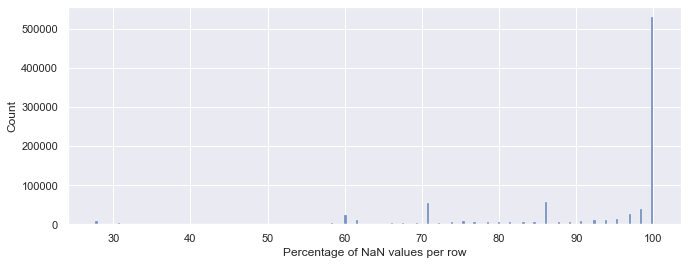

In [36]:
histogram_ed_stats_data_countries_with_nan =  sns.histplot(data=(ed_stats_data_countries_with_nan.drop(ed_stats_data_countries_with_nan.loc[:, 'Country Code':'Unnamed: 69'].columns, axis = 1)), x="Percentage of NaN values per row")

plt.show()

From the previous histogram we observe that a great majority of the indicators for each country has missing data. The ideal case would be that we keep those rows that have less than 40% of missing data. However, we observe that very few of them have less than 40% of missing data. This means that if we keep those rows only we may risk the chances of not having data for certain indicators.

For this reason we will now eliminate the rows that have more than 80% of missing values.

In [37]:
ed_stats_data_less_nan_per_country = ed_stats_data_countries_with_nan[ed_stats_data_countries_with_nan['Percentage of NaN values per row'] < 80]

In [ ]:
def create_df_row_country(df_data_top_ten_countries_geo_regions, country, min_year, max_year, step_year):
    df_top_ten_countries_by_row_new = pd.DataFrame(df_data_top_ten_countries_geo_regions[df_data_top_ten_countries_geo_regions['Country Name'] == country])
    df_top_ten_countries_by_row_new = df_top_ten_countries_by_row_new[[str(i) for i in range(min_year, max_year+step_year, step_year)]].T
    return df_top_ten_countries_by_row_new

In [38]:
ed_stats_data_less_nan_per_country.drop(ed_stats_data_less_nan_per_country.loc[:, 'Country Code':'Unnamed: 69'].columns, axis = 1).describe()

,Percentage of NaN values per row
count,162741.000000
mean,62.299586
std,14.095323
min,27.692308
25%,60.000000
50%,70.769231
75%,70.769231
max,78.461538


We observe that by eliminating the rows that have more than 80% of missing values, we kept 162741 rows of data out of 886930 that we had initially, which means around 18% of the data is saved.

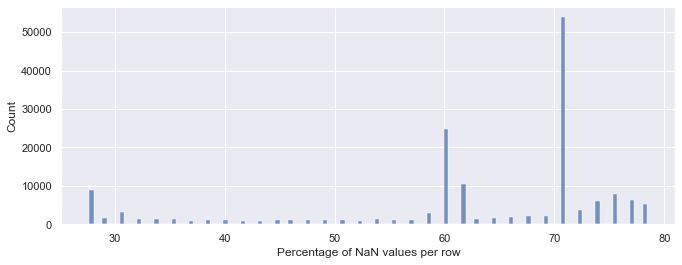

In [39]:
histogram_ed_stats_data_countries_with_less_nan =  sns.histplot(data=(ed_stats_data_less_nan_per_country.drop(ed_stats_data_less_nan_per_country.loc[:, 'Country Code':'Unnamed: 69'].columns, axis = 1)), x="Percentage of NaN values per row")

plt.show()

We also calculate the number of missing values for each year column of the new data frame. As we found earlier, we have around 80% of missing data and the next step is to know how many missing data there is per year and for each selected indicator. This will help us to chose those years with the less percentage of missing values.

**The following function computes the number of missing values per column. It receives a data frame created previously from eliminating those rows with more than 80% of missing values.**

In [40]:
def print_number_nan_values(data_less_nan_per_country):
    print('NA count per column:')
    n_missing = data_less_nan_per_country.drop(columns=['Unnamed: 69', 'Percentage of NaN values per row']).isna().sum(axis=0)
    pd.set_option('display.max_rows', len(n_missing))
    print(n_missing[n_missing > 0])
    pd.reset_option('display.max_rows')
    data_less_nan_per_country

In [41]:
print_number_nan_values(ed_stats_data_less_nan_per_country)

NA count per column:
1970    143544
1971    129973
1972    129540
1973    129245
1974    129055
1975    129377
1976    127646
1977    127366
1978    127579
1979    128230
1980    128067
1981    126671
1982    127187
1983    126384
1984    126288
1985    126144
1986    125328
1987    125836
1988    125734
1989    126741
1990     92538
1991     90854
1992     90089
1993     89445
1994     88329
1995     89020
1996     89264
1997     92231
1998     86404
1999     64325
2000     62905
2001     61637
2002     61564
2003     63230
2004     60718
2005     60126
2006     61108
2007     60510
2008     60921
2009     60708
2010      9857
2011     61361
2012     62375
2013     65347
2014     83962
2015     51958
2016    148506
2017    162741
2020    111305
2025    111305
2030    111305
2035    111305
2040    111305
2045    111305
2050    111305
2055    111305
2060    111305
2065    111305
2070    111305
2075    111305
2080    111305
2085    111305
2090    111305
2095    111305
2100    111305
dtyp

Text(0.5, 0, 'Year')

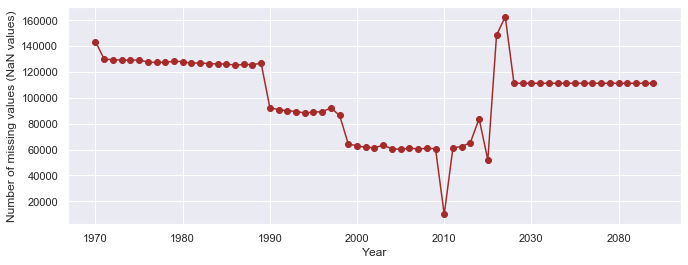

In [42]:
figure_ed_stats_nan_values_number = (ed_stats_data_less_nan_per_country.drop(columns=['Unnamed: 69', 'Percentage of NaN values per row']).isna().
                                    sum(axis=0)[ed_stats_data_less_nan_per_country.drop(columns=['Unnamed: 69', 'Percentage of NaN values per row']).isna().
                                    sum(axis=0) > 0]).drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 69', 
                                    'Percentage of NaN values per row']).plot(marker='o', linestyle='-', color='brown')

figure_ed_stats_nan_values_number.set_ylabel('Number of missing values (NaN values)')
figure_ed_stats_nan_values_number.set_xlabel('Year')

From the graph above we observe that a great number of missing values is still present in this data file.

We also calculated the percentage of missing values for each column.

**The following function computes the percentage of missing values per column. It receives a data frame created previously from eliminating those rows with more than 80% of missing values.**

In [43]:
def print_full_missing_values_percentage(data_less_nan_per_country):
    missing = (data_less_nan_per_country.drop(columns=['Unnamed: 69','Percentage of NaN values per row']).isna().mean())*100
    pd.set_option('display.max_rows', len(missing))
    print(missing)
    pd.reset_option('display.max_rows')

In [44]:
print_full_missing_values_percentage(ed_stats_data_less_nan_per_country)

Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
1970               88.203956
1971               79.864939
1972               79.598872
1973               79.417602
1974               79.300852
1975               79.498713
1976               78.435059
1977               78.263007
1978               78.393890
1979               78.793912
1980               78.693753
1981               77.835948
1982               78.153016
1983               77.659594
1984               77.600605
1985               77.512120
1986               77.010710
1987               77.322863
1988               77.260186
1989               77.878961
1990               56.862131
1991               55.827358
1992               55.357286
1993               54.961565
1994               54.275812
1995               54.700414
1996               54.850345
1997               56.673487
1998               53.092951
1999               39.525995
2000          

Text(0.5, 0, 'Year')

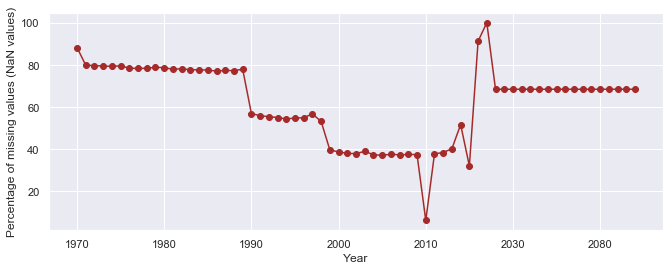

In [45]:
figure_ed_stats_isna_percentage = (ed_stats_data_less_nan_per_country.isna()*100).drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 69', 'Percentage of NaN values per row']).mean().plot(marker='o', linestyle='-', color='brown')

figure_ed_stats_isna_percentage.set_ylabel('Percentage of missing values (NaN values)')
figure_ed_stats_isna_percentage.set_xlabel('Year')

**From the previous graph we observe that the percentage of missing values (NaN values) for the years columns are less than 40% between 1999 and 2013, and then for 2015. We will repeat this procedure for each indicator later on.**

_A priori_ this is could be attributed to the fact that not all countries have data for all years and, we will need to take a range of years that will depend on the useful data for each indicator. This means that we will need to filter the data and we will probably repeat the same procedure as we did here.

It is important to remark that we will not replace NaN values with zeros because this will alter the distributions and it may lead to missinterpretation of the results.

Moreover, we will not eliminate the data until we explore the percentage of missing values for each indicator separately.

### Selection of the indicators of interest

Now we are going to create a new data frame that is filtered according to the indicators that we selected previously. For this, we will include in our new data frame only the indicators that we choose. We will do it from the unique ID from the 'Indicator Code', whose values are the same as the values that we saved in the list of indicators. We can do this because we made sure that there are not duplicated indicator codes in all the data. 

In [46]:
ed_stats_data_filtered = ed_stats_data_less_nan_per_country[ed_stats_data_less_nan_per_country['Indicator Code'].isin(list_indicators)]

In [47]:
ed_stats_data_filtered.shape

(1283, 71)

As we observe, the filtered data contains 1283 rows and 71 columns. We have now the indicators that we selected, for each country for the years from 1970 to 2100.


### Filtering of the 'Country Name' column

Another important remark is to look at the countries from the data.

For this purpose, the pycountry package is used. For more reference:

https://stackoverflow.com/questions/41245330/check-if-a-country-entered-is-one-of-the-countries-of-the-world/46249796

https://pypi.org/project/pycountry/16.11.27.1/

Pycountry package provides a database from the ISO-3166 standard. The official name of the standard is Codes for the representation of names of countries and their subdivisions.

For more information, consult reference: 

https://en.wikipedia.org/wiki/ISO_3166.

The following cell creates a list of countries from their Alpha3 code. Whenever a country in our data base does not have the corresponding Alpha3 code, it will be saved into a list of not countries.

This step will be useful for clasifying the data by country or geographical regions. Also it will allow to verify that all countries have their correct nomenclature of Alpha3.

In [48]:

list_of_countries = [country.alpha_3 for country in list(pycountry.countries)]

list_not_country = ed_stats_data_filtered[~(ed_stats_data_filtered['Country Code'].isin(list_of_countries))]['Country Name'].drop_duplicates().tolist()

print(list_not_country)


['Arab World', 'East Asia & Pacific', 'East Asia & Pacific (excluding high income)', 'Euro area', 'Europe & Central Asia', 'Europe & Central Asia (excluding high income)', 'European Union', 'Heavily indebted poor countries (HIPC)', 'High income', 'Latin America & Caribbean', 'Latin America & Caribbean (excluding high income)', 'Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income', 'Middle East & North Africa', 'Middle East & North Africa (excluding high income)', 'Middle income', 'North America', 'OECD members', 'South Asia', 'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)', 'Upper middle income', 'World', 'Kosovo']


From the previous list, we observed that Kosovo is not recognized as a country. This is because its Alpha3 code from the data set that we are using is not correct. For example, Kosovo should have XXK, instead of XKX. 

https://www.iban.com/country-codes

In [49]:
ed_stats_data_filtered.loc[ed_stats_data_filtered['Country Name']=='Kosovo']

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,Percentage of NaN values per row
474032,Kosovo,XKX,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.846154


Moreover, the following two lists that contain entries that do not correspond to country names, are going to be needed for further filtering.

In [50]:
list_not_country_from_data = ['East Asia & Pacific (excluding high income)', 
'Euro area', 
'Europe & Central Asia (excluding high income)', 
'European Union', 
'Heavily indebted poor countries (HIPC)', 
'High income', 
'Latin America & Caribbean (excluding high income)',
'Least developed countries: UN classification',
'Low & middle income',
'Low income',
'Lower middle income',
'Middle East & North Africa (excluding high income)',
'Middle income',
'OECD members',
'Sub-Saharan Africa (excluding high income)',
'Upper middle income',
'World']

list_geo_regions = ['Arab World', 
'East Asia & Pacific', 
'Europe & Central Asia', 
'Latin America & Caribbean',
'Middle East & North Africa',
'North America',
'South Asia',
'Sub-Saharan Africa']

The following functions are going to be used to remove non-counties data entries and to categorize the data by gegraphical regions.

**This function creates a data frame that contains countries only. It receives a filtered data frame created previously in the subsection _Selection of the indicators of interest_.**

In [51]:
def remove_lists_no_countries(df_data_filtered):
    df = pd.DataFrame(df_data_filtered[(~df_data_filtered['Country Name'].isin(list_geo_regions))
    & (~df_data_filtered['Country Name'].isin(list_not_country_from_data))])
    return df

**This function creates a data frame that contains geographical regions only. It receives a filtered data frame created previously in the subsection _Selection of the indicators of interest_.**

In [52]:
def create_ed_stats_data_filtered_geo_regions(df_data_filtered):
    df_ed_stats_data_filtered_geo_regions = pd.DataFrame(df_data_filtered.loc[df_data_filtered['Country Name'].isin(list_geo_regions)])
    return df_ed_stats_data_filtered_geo_regions 

We will create now a new data frame that contains only countries in the 'Country Name' column by calling the function remove_lists_no_countries().

In [53]:
ed_stats_data_filtered_only_countries = remove_lists_no_countries(ed_stats_data_filtered)

In [54]:
ed_stats_data_filtered_only_countries.shape

(1165, 71)

As we observe, the newly filtered data contains 1165 rows and 71 columns.

As we can characterize our data by geographical regions as well, we can also exclude the countries and keep such geograhical regions. We do this by calling the function create_ed_stats_data_filtered_geo_regions().

In [55]:
ed_stats_data_filtered_only_geo_regions = create_ed_stats_data_filtered_geo_regions(ed_stats_data_filtered)

In [56]:
ed_stats_data_filtered_only_geo_regions.shape

(37, 71)

The previous data frame contains 37 rows and 71 columns, since we excluded the countries from it.

### Declaration of functions that are going to be used for further analyses

The following functions are created to be used from now on the notebook.

**The following function creates a data frame for the indicators of interest from the indicator code. The function receives a filtered data frame that contains either the countries or the geographical regions obtained previously from the function create_ed_stats_data_filtered_geo_regions() (See subsection _Filtering of the 'Country Name' column_). It receives a column 'Indicator Code', and the corresponding indicator code as well.**

In [57]:
def create_df_from_indicator_code(df_data_filtered_countries_geo_regions, column_indicator_code, indicator_code):
    new_df_indicator = pd.DataFrame(df_data_filtered_countries_geo_regions[df_data_filtered_countries_geo_regions[column_indicator_code] == indicator_code])
    return new_df_indicator

**The following function creates a graph of the percentage of the average of missing values for the indicators of interest, which is obtained from the function print_full_missing_values_percentage() (See _Exploration of missing values subsection_). The function graph_nan() receives now a data frame obtained from create_df_from_indicator_code() that corresponds to each indicator.**

In [71]:
def graph_nan(df_is_nan_percentage, color): 
    
    figure_is_nan = (df_is_nan_percentage.isna()*100).drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 69', 'Percentage of NaN values per row']).mean().plot(marker='o', linestyle='-', color=color)
    indicator_name = df_is_nan_percentage['Indicator Name'].values[0]

    y_label = '(Percentage) % of {} \n missing values (NaN values)'.format(indicator_name)
    y_label = ("\n".join(textwrap.wrap(y_label,50)))
    
    figure_is_nan.set_ylabel(y_label)
    figure_is_nan.set_xlabel('Year')
    plt.show()

**The following function creates a data frame for the relevant years for the indicators of interest. The range of relevant years is chosen according to their percentage average of missing values. This is, we will consider those years with less than 40% of missing values. The function receives a data frame corresponding to each indicator obtained previously from the function create_df_from_indicator_code(), the minimum and the maximum year from the range of relevant years, and the desired year step.**

In [59]:
def create_df_country_and_geo_regions_years_relevant(df_data_filtered_countries_geo_regions, min_year, max_year, step_year):
    df_country_years_relevant = pd.DataFrame(df_data_filtered_countries_geo_regions[[str(i) for i in range(min_year, max_year+step_year, step_year)]+['Country Name']+['Indicator Name']])
    return df_country_years_relevant

**The following function creates a graph of the data of the indicators within the range of relevant years. It receives a data frame obtained from the function create_df_country_and_geo_regions_years_relevant().**

In [60]:
def graph_relevant_years(df_data_countries_geo_regions_with_relevant_years, color): 
       
    figure_relevant_years = df_data_countries_geo_regions_with_relevant_years.drop(columns=['Country Name', 'Indicator Name']).mean().plot(marker='o', linestyle='-', color=color)
    indicator_name = df_data_countries_geo_regions_with_relevant_years['Indicator Name'].values[0]

    y_label = 'Average of {} \n'.format(indicator_name)
    y_label = ("\n".join(textwrap.wrap(y_label,50)))
    
    figure_relevant_years.set_ylabel(y_label)
    figure_relevant_years.set_xlabel('Year')
    plt.show()

**The following function creates a graph of the top ten of countries or geographical regions for a determined year within the range of relevant years. The function receives a data frame that is obtained previously from  the function create_df_country_and_geo_regions_years_relevant().**

In [61]:
def graph_top_ten_countries_and_geo_regions(df_data_countries_geo_regions_with_relevant_years, palette, x, y): 
    
    top_ten_countries_and_geo_regions_figure = sns.barplot(y=y, x=x, data=df_data_countries_geo_regions_with_relevant_years.nlargest(10, x), palette=palette)
    indicator_name = df_data_countries_geo_regions_with_relevant_years['Indicator Name'].values[0]

    y_label = 'Average of {} \n'.format(indicator_name)
    y_label = ("\n".join(textwrap.wrap(y_label,50)))
    
    top_ten_countries_and_geo_regions_figure.set_ylabel(y_label)
    top_ten_countries_and_geo_regions_figure.set_xlabel(x)
    plt.show()

**The following function creates a new data frame with the average of the indicator for the relevant range of years. The function receives a data frame that is obtained previously from the function create_df_country_and_geo_regions_years_relevant(), a string with the range of years (ex. '1990 - 2016') and a list of the relevant years (ex. [str(i) for i in range(minimum year, maximum year)]).**

In [62]:
def average_relevant_years_for_top_ten(df_data_countries_geo_regions_with_relevant_years, name_column_relevant_years, list_of_columns_relevant_years):
    df_data_countries_geo_regions_with_relevant_years[name_column_relevant_years] = df_data_countries_geo_regions_with_relevant_years[list_of_columns_relevant_years].mean(axis=1)
    return(df_data_countries_geo_regions_with_relevant_years)

**The following function creates a table to visualize the top 10 countries with their mean and standard deviation. It receives a data frame obtained from the function average_relevant_years_for_top_ten(). It receives also the column named with the range of relevant years corresponding to each indicator (ex. '1990 - 2016').**

In [63]:
def print_table_stats(df_data_top_ten_countries_geo_regions, name_column_relevant_years):

    list_country = list((df_data_top_ten_countries_geo_regions.nlargest(10, name_column_relevant_years)['Country Name']))
    list_mean  = list(df_data_top_ten_countries_geo_regions.nlargest(10, name_column_relevant_years).drop(columns=['Country Name', 'Indicator Name', name_column_relevant_years]).mean(axis=1))
    list_std = list(df_data_top_ten_countries_geo_regions.nlargest(10, name_column_relevant_years).drop(columns=['Country Name', 'Indicator Name', name_column_relevant_years]).std(axis=1))
 
    new_df = pd.DataFrame(data=list(zip(list_country, list_mean, list_std)), columns =['Country','Mean top 10 country', 'Standard deviation top 10 country'])

    modified_new_df = new_df.set_index('Country')

    return modified_new_df

**The following function creates a transposed data frame for one country of the top 10 for the range of relevant years. It receives a data frame obtained from the function average_relevant_years_for_top_ten(). It receives also a variable named country, the minimum and maximum year of the range of relevant years, and the year step desired. This function will be used after in the function plot_top_10_per_coutry().**

In [64]:
def create_df_row_country(df_data_top_ten_countries_geo_regions, country, min_year, max_year, step_year):
    df_top_ten_countries_by_row_new = pd.DataFrame(df_data_top_ten_countries_geo_regions[df_data_top_ten_countries_geo_regions['Country Name'] == country])
    df_top_ten_countries_by_row_new = df_top_ten_countries_by_row_new[[str(i) for i in range(min_year, max_year+step_year, step_year)]].T
    return df_top_ten_countries_by_row_new

**The folliwing function graphs the evolution of a determined indicator in years for the top ten countries. It receives a data frame obtained from the function create_df_row_country() and a data frame obtained from the function average_relevant_years_for_top_ten(). This function will be used after in the function plot_top_10_per_coutry().**

In [65]:
palette = itertools.cycle(sns.color_palette())

def graph_country_row_relevant_years(df_top_ten_countries_by_row_new, df_data_top_ten_countries_geo_regions): 
       
    figure_relevant_years_country_row = df_top_ten_countries_by_row_new.plot(marker='o', linestyle='-', color=next(palette))
    indicator_name = df_data_top_ten_countries_geo_regions['Indicator Name'].values[0]

    y_label = '{}'.format(indicator_name)
    y_label = ("\n".join(textwrap.wrap(y_label,50)))
    
    figure_relevant_years_country_row.set_ylabel(y_label)
    figure_relevant_years_country_row.set_xlabel('Year')

**The following function produces a graph of the evolution of a determined indicator in the relevant years. It receives a data frame obtained from the function average_relevant_years_for_top_ten(), the column named as the relevant range of years, the minimum and the maximum year of such range, and the step year.**

In [66]:
def plot_top_10_per_coutry(df_data_top_ten_countries_geo_regions, name_column_relevant_years, min_year, max_year, step_year):

    list_country = list((df_data_top_ten_countries_geo_regions.nlargest(10, name_column_relevant_years)['Country Name']))

    top_10_countries_list = []
    for country in list_country:
        df_top_ten_countries_by_row_new = create_df_row_country(df_data_top_ten_countries_geo_regions, country, min_year, max_year, step_year)
        df_top_ten_countries_by_row_new.columns=[country]
        top_10_countries_list.append(df_top_ten_countries_by_row_new)

        graph_country_row_relevant_years(df_top_ten_countries_by_row_new, df_data_top_ten_countries_geo_regions)

    result_rows_top_10_countries = pd.concat(top_10_countries_list, axis=1)
    result_rows_top_10_countries = pd.DataFrame(result_rows_top_10_countries)

## Revision of the selected indicators for relevant years

We will create a data frame for each indicator, which we will explore in more detail in order to select the years that will be useful to report statistical quantities and to observe trends.

### Creation of a data frame for the indicator Population, ages 15-24, total

We will make use of the function create_df_from_indicator_code() to create the data frame corresponding to this indicator. For this, we will pass the 'Indicator Code' value corresponding and the recently filtered data. 

The data frame that we passed to the function create_df_from_indicator_code() is the one that contains contries only. This means that this function can also receive the data that contains geographical regions.

In [67]:
new_df_indicator_population_ages_only_countries = create_df_from_indicator_code(ed_stats_data_filtered_only_countries, 'Indicator Code','SP.POP.1524.TO.UN')

We will look again at the percentage average of missing values to know which year contains the less number of missing data. This will be useful if we need to look at the year that contains the largest data entries.

For this, uncomment the following cell to call the function print_full_missing_values_percentage().

In [68]:
print_full_missing_values_percentage(new_df_indicator_population_ages_only_countries)

Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
1970              100.000000
1971              100.000000
1972              100.000000
1973              100.000000
1974              100.000000
1975              100.000000
1976              100.000000
1977              100.000000
1978              100.000000
1979              100.000000
1980              100.000000
1981              100.000000
1982              100.000000
1983              100.000000
1984              100.000000
1985              100.000000
1986              100.000000
1987              100.000000
1988              100.000000
1989              100.000000
1990                0.549451
1991                0.549451
1992                0.549451
1993                0.549451
1994                0.549451
1995                0.549451
1996                0.549451
1997                0.549451
1998                0.000000
1999                0.000000
2000          

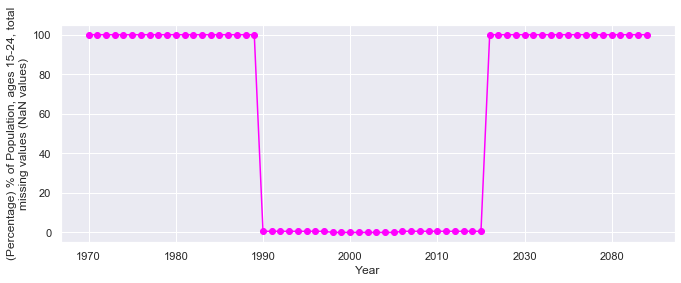

In [72]:
graph_nan(new_df_indicator_population_ages_only_countries,'magenta')

We plotted the missing values for the years by calling the function graph_nan() above. We observe from the graph that there are missing values for certain years. However, we will be able to analyse the data from 1990 to 2015, which contain a very low percentage of missing values. 

To characterize the data by geographical regions, we call the funtion create_df_from_indicator_code() from the next cell.

In [73]:
new_df_indicator_population_ages_only_geo_regions = create_df_from_indicator_code(ed_stats_data_filtered_only_geo_regions,'Indicator Code','SP.POP.1524.TO.UN')

In [74]:
new_df_indicator_population_ages_only_geo_regions

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,Percentage of NaN values per row


We observed that there are no row entries. This is, this indicator has not data available for geographical region.

Now we will create a data frame for the indicator by keeping the data from 1990 to 2015. For this, we call the function create_df_country_and_geo_regions_years_relevant(). This function receives the data frame that is created either for the countries or geographical regions, a mimimum and maximum year, and a determined step.

In [75]:
df_population_group_country_years_relevant = create_df_country_and_geo_regions_years_relevant(new_df_indicator_population_ages_only_countries,1990,2015,1)

We calculated the average for each year of Population, ages 15-24, total, which means it is an average for all the countries present in the data frame. We plotted such avegare as a function of years to see the general tendence of evolution of this indicator in time.

We called the function graph_relevant_years().

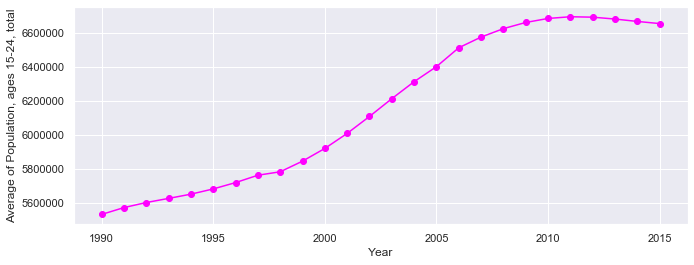

In [76]:
graph_relevant_years(df_population_group_country_years_relevant,'magenta')

Then we create a new data frame that has now the calculated average of the indicator values across the years from 1990 to 2015 for each country. The way to do this is calling the function average_relevant_years_for_top_ten(), which again receives the data frame that is created either for the countries or geographical regions, a name for the range of years according to the previous results, and a list for such range of years. The idea is to compare this indicator by country.

In [77]:
df_average_relevant_years_population_group = average_relevant_years_for_top_ten(df_population_group_country_years_relevant,'1990 - 2015',[str(i) for i in range(1990,2015)])

**This procedure was carried out to explore all the indicators selected that are thought to be relevant for the company problem. This is, the steps described for the present indicator are repeated to prepare the data until we can present relevant client prospects according to the comparison by country that will be presented in the following section: Analysis of the data available for the selected indicators and relevant years.**

### Creation of a data frame for the indicator Personal computers (per 100 people)

In [78]:
new_df_indicator_pc_users_only_countries = create_df_from_indicator_code(ed_stats_data_filtered_only_countries,'Indicator Code','IT.CMP.PCMP.P2')

In [79]:
new_df_indicator_pc_users_only_geo_regions = create_df_from_indicator_code(ed_stats_data_filtered_only_geo_regions,'Indicator Code','IT.CMP.PCMP.P2')

In [80]:
### Uncomment to print the percentage of missing values for this indicator

# print_full_missing_values_percentage(new_df_indicator_pc_users_only_countries)

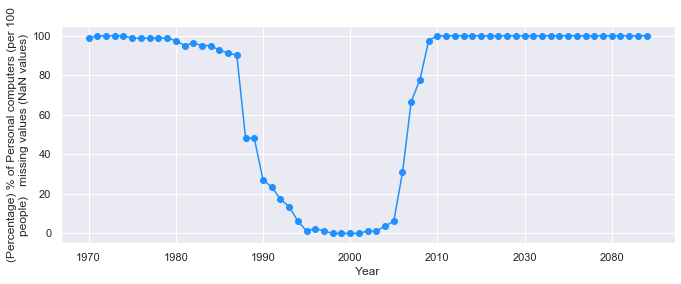

In [81]:
graph_nan(new_df_indicator_pc_users_only_countries,'dodgerblue')

The range of years that contains less than 40% of missing data is between 1990 and 2006 and we will keep this range of years for this indicator from now on for its analysis.

In [82]:
df_pc_users_country_years_relevant = create_df_country_and_geo_regions_years_relevant(new_df_indicator_pc_users_only_countries,1990,2006,1)

In [83]:
df_pc_users_geo_regions_years_relevant = create_df_country_and_geo_regions_years_relevant(new_df_indicator_pc_users_only_geo_regions,1990,2006,1)

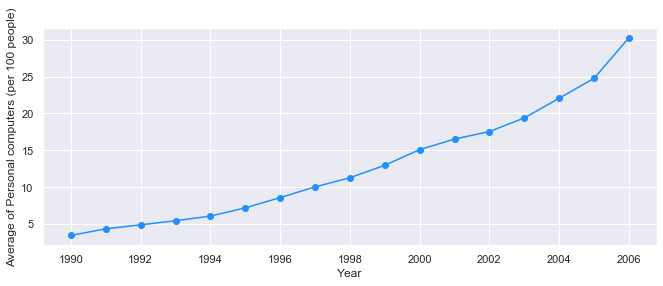

In [84]:
graph_relevant_years(df_pc_users_country_years_relevant,'dodgerblue')

In [85]:
df_average_relevant_years_pc_users_countries = average_relevant_years_for_top_ten(df_pc_users_country_years_relevant,'1990 - 2006',[str(i) for i in range(1990,2006)])

In [86]:
df_average_relevant_years_pc_users_geo_regions = average_relevant_years_for_top_ten(df_pc_users_geo_regions_years_relevant,'1990 - 2006',[str(i) for i in range(1990,2006)])

### Creation of a data frame for the indicator Internet users (per 100 people)

In [87]:
new_df_indicator_internet_users_only_countries = create_df_from_indicator_code(ed_stats_data_filtered_only_countries,'Indicator Code','IT.NET.USER.P2')

In [88]:
new_df_indicator_internet_users_only_geo_regions = create_df_from_indicator_code(ed_stats_data_filtered_only_geo_regions,'Indicator Code','IT.NET.USER.P2')

In [89]:
### Uncomment to print the percentage of missing values for this indicator

# print_full_missing_values_percentage(new_df_indicator_internet_users_only_countries)

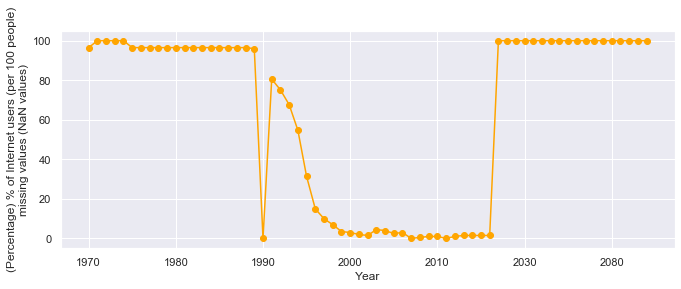

In [90]:
graph_nan(new_df_indicator_internet_users_only_countries,'orange')

According to the previous graph, the range of years that contains less than 40% of missing data is between 1995 and 2016. We will keep this years for the analysis of this indicator.

In [91]:
df_internet_users_country_years_relevant = create_df_country_and_geo_regions_years_relevant(new_df_indicator_internet_users_only_countries,1995,2016,1)

In [92]:
df_internet_users_geo_regions_years_relevant = create_df_country_and_geo_regions_years_relevant(new_df_indicator_internet_users_only_geo_regions,1995,2016,1)

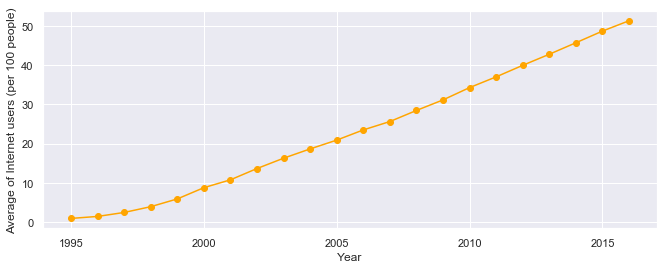

In [93]:
graph_relevant_years(df_internet_users_country_years_relevant,'orange')

In [94]:
df_average_relevant_years_internet_users_countries = average_relevant_years_for_top_ten(df_internet_users_country_years_relevant,'1995 - 2016',[str(i) for i in range(1995,2016)])

In [95]:
df_average_relevant_years_internet_users_geo_regions = average_relevant_years_for_top_ten(df_internet_users_geo_regions_years_relevant,'1995 - 2016',[str(i) for i in range(1995,2016)])

### Creation of a data frame for the indicator Enrolment in secondary education, both sexes (number)

In [96]:
new_df_indicator_secondary_enrolment_only_countries = create_df_from_indicator_code(ed_stats_data_filtered_only_countries,'Indicator Code','SE.SEC.ENRL')

In [97]:
new_df_indicator_secondary_enrolment_only_geo_regions = create_df_from_indicator_code(ed_stats_data_filtered_only_geo_regions,'Indicator Code','SE.SEC.ENRL')

In [98]:
### Uncomment to print the percentage of missing values for this indicator

# print_full_missing_values_percentage(new_df_indicator_secondary_enrolment_only_countries)

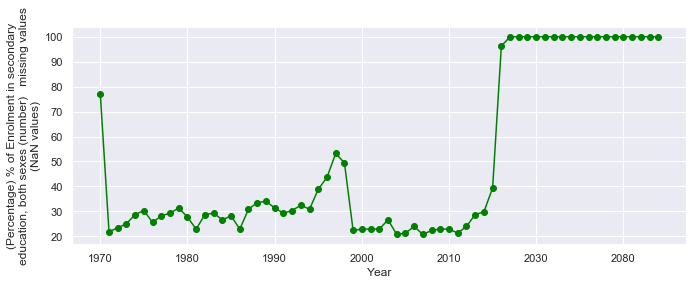

In [99]:
graph_nan(new_df_indicator_secondary_enrolment_only_countries,'green')

According to the previous graph, there is less than 40% of missing valaues from 1971 to 1995, then from 1999 to 2015. We will only consider at the data from 1999 to 2015, since is the more recent.

In [100]:
df_secondary_enrolment_country_years_relevant = create_df_country_and_geo_regions_years_relevant(new_df_indicator_secondary_enrolment_only_countries,1999,2015,1)

In [101]:
df_secondary_enrolment_geo_regions_years_relevant = create_df_country_and_geo_regions_years_relevant(new_df_indicator_secondary_enrolment_only_geo_regions,1999,2015,1)

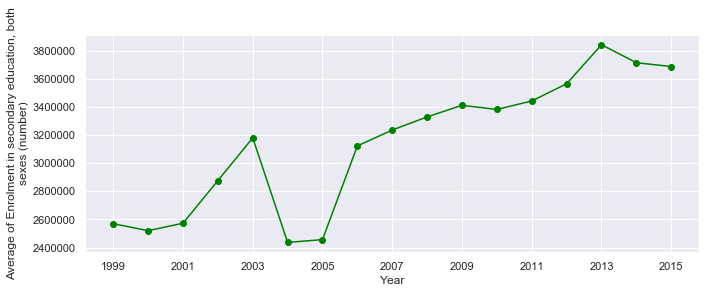

In [102]:
graph_relevant_years(df_secondary_enrolment_country_years_relevant,'green')

In [103]:
df_average_relevant_years_secondary_enrolment_countries = average_relevant_years_for_top_ten(df_secondary_enrolment_country_years_relevant,'1999 - 2015',[str(i) for i in range(1999,2015)])

In [104]:
df_average_relevant_years_secondary_enrolment_geo_regions = average_relevant_years_for_top_ten(df_secondary_enrolment_geo_regions_years_relevant,'1999 - 2015',[str(i) for i in range(1999,2015)])

### Creation of a data frame for the indicator Enrolment in tertiary education, all programmes, both sexes (number)

In [105]:
new_df_indicator_tertiary_enrolment_only_countries = create_df_from_indicator_code(ed_stats_data_filtered_only_countries,'Indicator Code','SE.TER.ENRL')

In [106]:
new_df_indicator_tertiary_enrolment_only_geo_regions = create_df_from_indicator_code(ed_stats_data_filtered_only_geo_regions,'Indicator Code','SE.TER.ENRL')

In [107]:
### Uncomment to print the percentage of missing values for this indicator

# print_full_missing_values_percentage(new_df_indicator_tertiary_enrolment_only_countries)

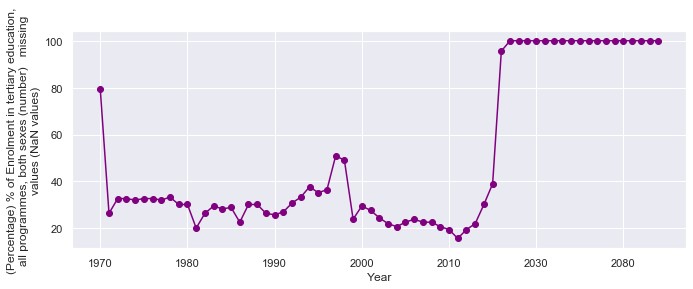

In [108]:
graph_nan(new_df_indicator_tertiary_enrolment_only_countries,'purple')

According to the previous graph, there is less than 40% of missing valaues from 1999 to 2015. We will keep this range of years.

In [109]:
df_tertiary_enrolment_country_years_relevant = create_df_country_and_geo_regions_years_relevant(new_df_indicator_tertiary_enrolment_only_countries,1999,2015,1)

In [110]:
df_tertiary_enrolment_geo_regions_years_relevant = create_df_country_and_geo_regions_years_relevant(new_df_indicator_tertiary_enrolment_only_geo_regions,1999,2015,1)

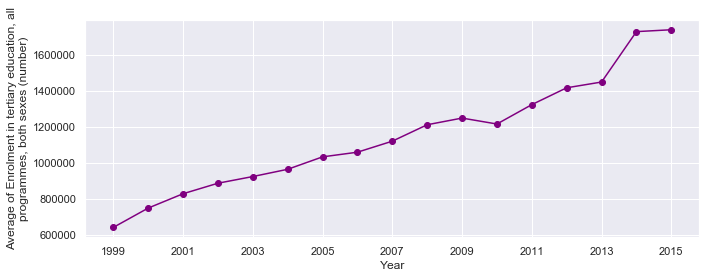

In [111]:
graph_relevant_years(df_tertiary_enrolment_country_years_relevant,'purple')

In [112]:
df_average_relevant_years_tertiary_enrolment_countries = average_relevant_years_for_top_ten(df_tertiary_enrolment_country_years_relevant,'1999 - 2015',[str(i) for i in range(1999,2015)])

In [113]:
df_average_relevant_years_tertiary_enrolment_geo_regions = average_relevant_years_for_top_ten(df_tertiary_enrolment_geo_regions_years_relevant,'1999 - 2015',[str(i) for i in range(1999,2015)])

### Creation of a data frame for the indicator GDP per capita, PPP (current international $)

In [114]:
new_df_indicator_gdp_only_countries = create_df_from_indicator_code(ed_stats_data_filtered_only_countries,'Indicator Code','NY.GDP.PCAP.PP.CD')

In [115]:
new_df_indicator_gdp_only_geo_regions = create_df_from_indicator_code(ed_stats_data_filtered_only_geo_regions,'Indicator Code','NY.GDP.PCAP.PP.CD')

In [116]:
### Uncomment to print the percentage of missing values for this indicator

# print_full_missing_values_percentage(new_df_indicator_gdp_only_countries)

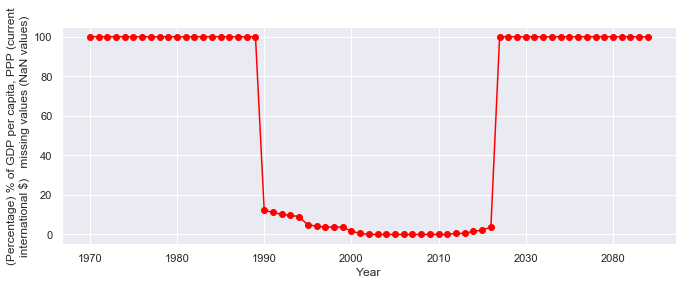

In [117]:
graph_nan(new_df_indicator_gdp_only_countries,'red')

According to the previous graph, there is less than 40% of missing valaues from 1990 to 2016. We will keep this range of years years.

In [118]:
df_gdp_country_years_relevant = create_df_country_and_geo_regions_years_relevant(new_df_indicator_gdp_only_countries,1990,2016,1)

In [119]:
df_gdp_geo_regions_years_relevant = create_df_country_and_geo_regions_years_relevant(new_df_indicator_gdp_only_geo_regions,1990,2016,1)

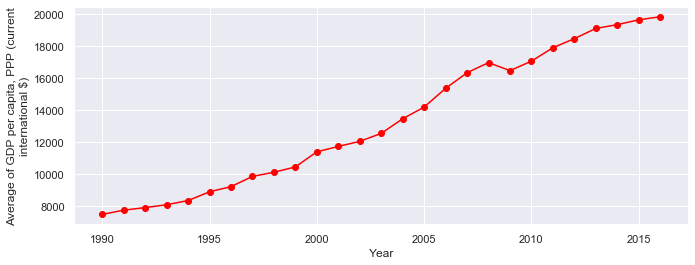

In [120]:
graph_relevant_years(df_gdp_country_years_relevant,'red')

In [121]:
df_average_relevant_years_gdp_countries = average_relevant_years_for_top_ten(df_gdp_country_years_relevant,'1990 - 2016',[str(i) for i in range(1990,2016)])

In [122]:
df_average_relevant_years_gdp_geo_regions = average_relevant_years_for_top_ten(df_gdp_geo_regions_years_relevant,'1990 - 2016',[str(i) for i in range(1990,2016)])

### Creation of a data frame for the indicator Projection: Percentage of the population age 25-29 by highest level of educational attainment. Post Secondary. Total

In [123]:
new_df_indicator_projection_post_secondary_ed_only_countries = create_df_from_indicator_code(ed_stats_data_filtered_only_countries,'Indicator Code','PRJ.ATT.2529.4.MF')

In [124]:
new_df_indicator_projection_post_secondary_ed_only_geo_regions = create_df_from_indicator_code(ed_stats_data_filtered_only_geo_regions,'Indicator Code','PRJ.ATT.2529.4.MF')

In [125]:
new_df_indicator_projection_post_secondary_ed_only_geo_regions.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,Percentage of NaN values per row


We observed that there are no row entries. This is, this indicator has not data available for geographical region.

In [126]:
### Uncomment to print the percentage of missing values for this indicator

# print_full_missing_values_percentage(new_df_indicator_projection_post_secondary_ed_only_countries)

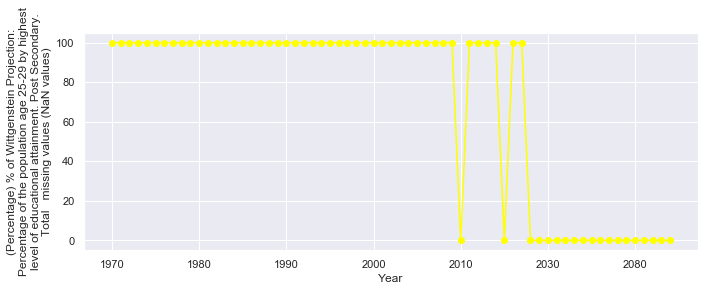

In [127]:
graph_nan(new_df_indicator_projection_post_secondary_ed_only_countries,'yellow')

According to the previous graph, there is less than 40% of missing values on the years 2010 and 2015, and also from 2020 to 2100. We will keep this range of years years.

In [128]:
#step_year = 5 recommended for this indicator 
df_projection_post_secondary_ed_country_years_relevant = create_df_country_and_geo_regions_years_relevant(new_df_indicator_projection_post_secondary_ed_only_countries,2020,2100,5)

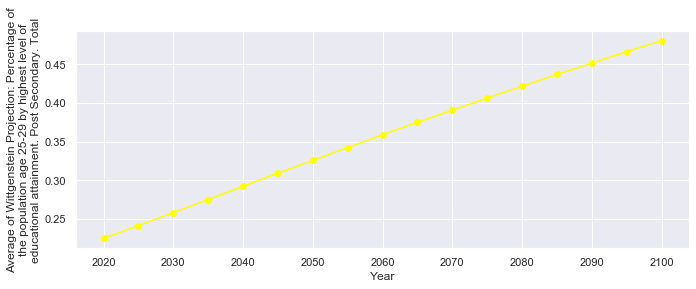

In [129]:
graph_relevant_years(df_projection_post_secondary_ed_country_years_relevant,'yellow')

In [130]:
df_average_relevant_years_projection_tertiary_ed_countries = average_relevant_years_for_top_ten(df_projection_post_secondary_ed_country_years_relevant,'2020 - 2100',[str(i) for i in range(2020,2100,5)])

## Analysis of the data available for the selected indicators and relevant years

### Population, ages 15-24, total

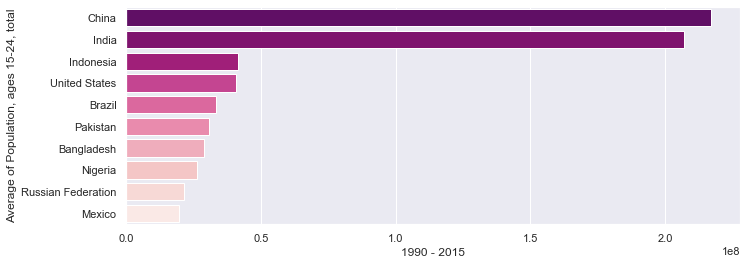

In [131]:
graph_top_ten_countries_and_geo_regions(df_average_relevant_years_population_group,'RdPu_r','1990 - 2015', 'Country Name')

In [132]:
df_table_mean_std_top_ten = print_table_stats(df_average_relevant_years_population_group,'1990 - 2015')
df_table_mean_std_top_ten

,Mean top 10 country,Standard deviation top 10 country
Country,,
China,2.161629e+08,1.513938e+07
India,2.084619e+08,2.570123e+07
Indonesia,4.157602e+07,1.410595e+06
United States,4.105920e+07,3.435548e+06
Brazil,3.321308e+07,1.993811e+06
Pakistan,3.098327e+07,7.132889e+06
Bangladesh,2.927054e+07,3.888743e+06
Nigeria,2.673588e+07,6.040415e+06
Russian Federation,2.124383e+07,2.794309e+06


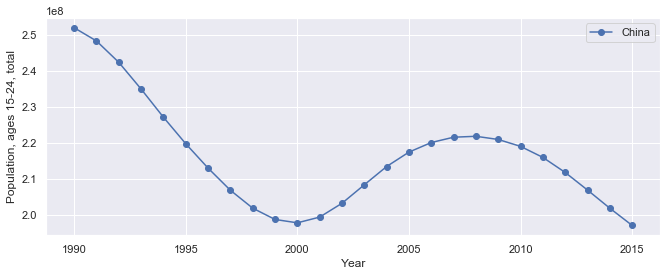

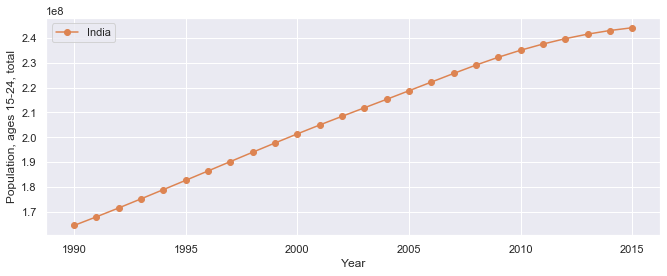

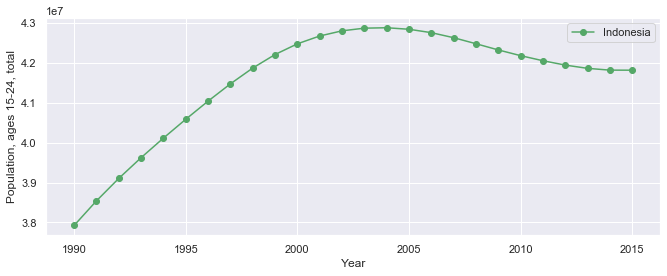

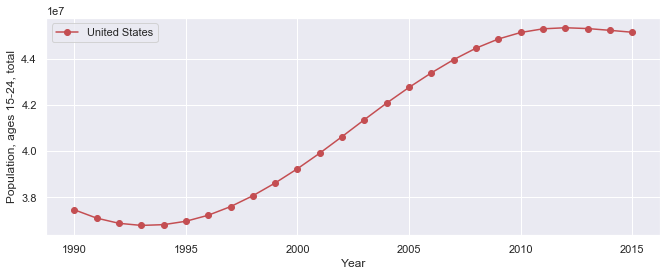

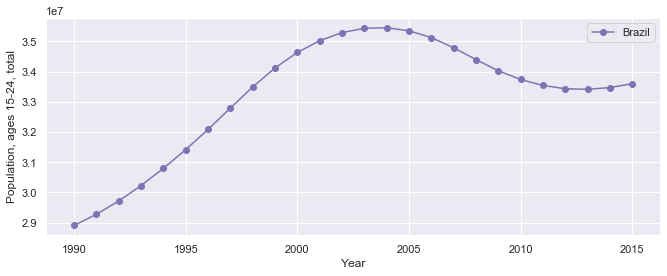

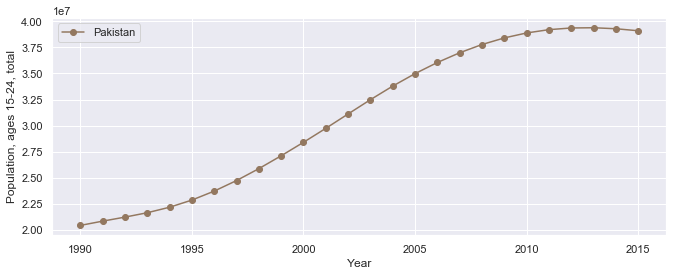

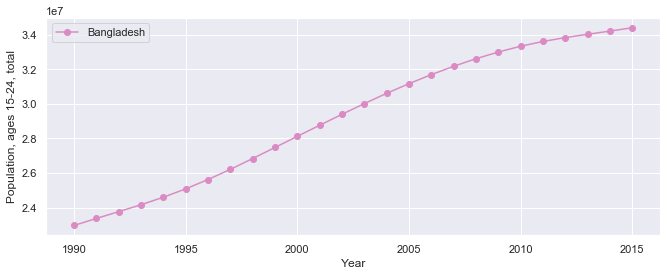

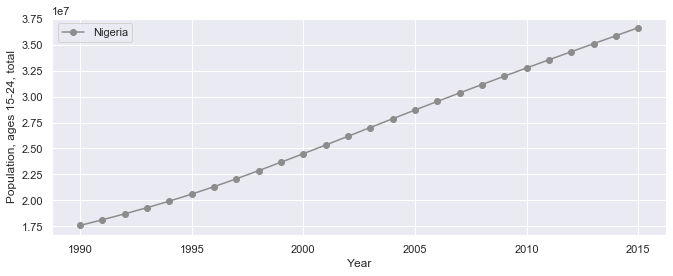

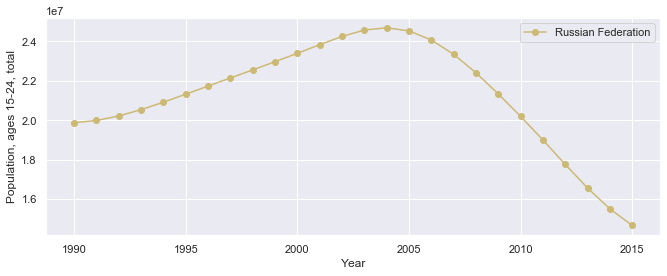

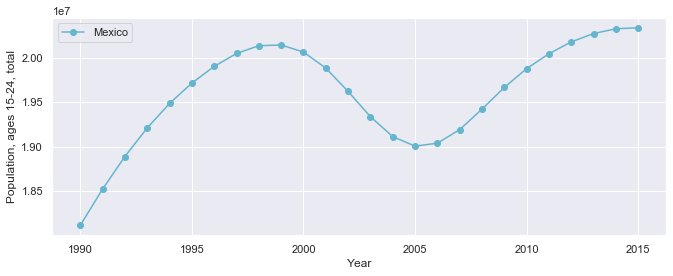

In [133]:
figs_countries_of_top_10_ages_groups = plot_top_10_per_coutry(df_average_relevant_years_population_group,'1990 - 2015', 1990, 2015, 1)

### Personal computers (per 100 people)

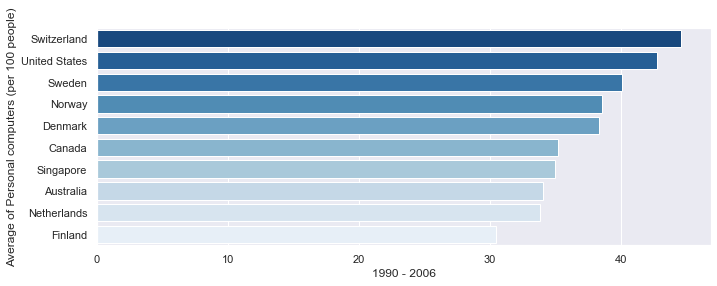

In [134]:
graph_top_ten_countries_and_geo_regions(df_average_relevant_years_pc_users_countries,'Blues_r','1990 - 2006', 'Country Name')

In [135]:
df_table_mean_std_top_ten = print_table_stats(df_average_relevant_years_pc_users_countries,'1990 - 2006')
df_table_mean_std_top_ten

,Mean top 10 country,Standard deviation top 10 country
Country,,
Switzerland,47.211879,28.165007
United States,45.246776,20.643806
Sweden,42.902756,26.118360
Norway,40.043380,16.339260
Denmark,40.331133,21.005607
Canada,38.654056,25.515943
Singapore,36.949846,22.370883
Australia,34.028258,15.178501
Netherlands,37.174808,25.101921


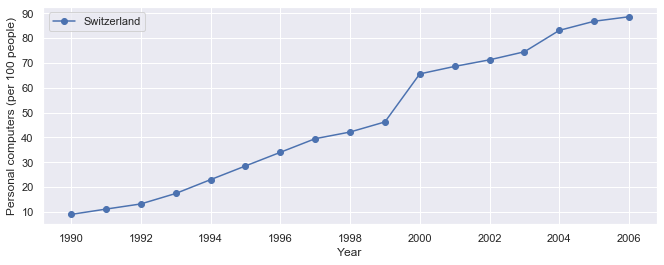

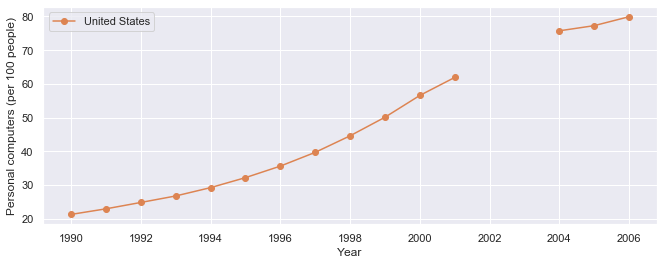

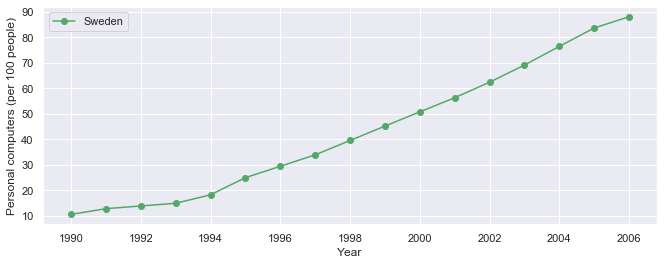

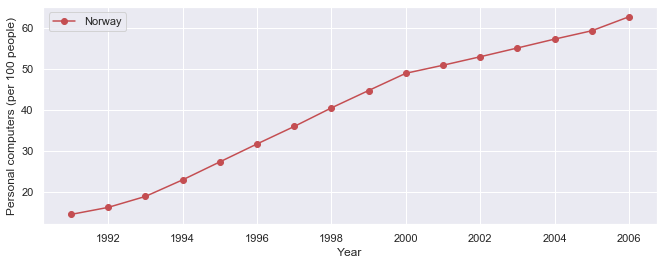

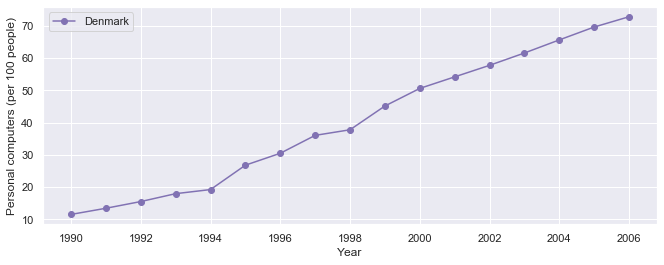

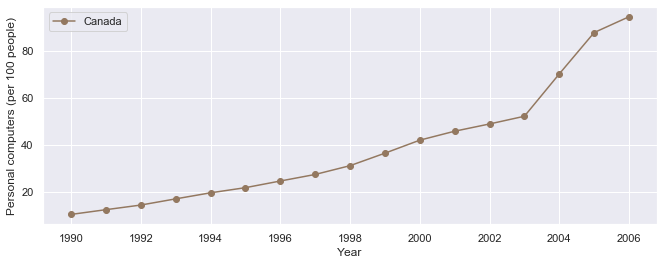

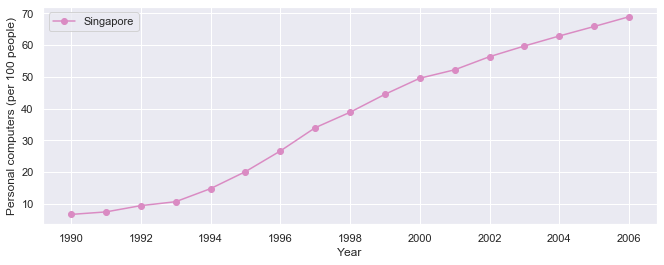

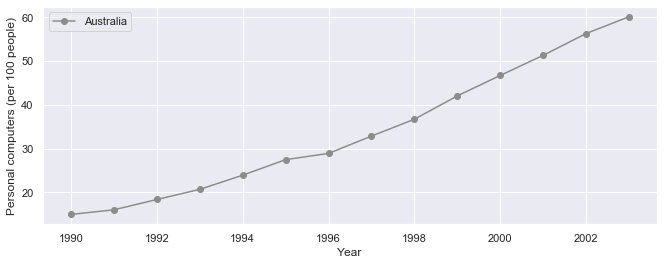

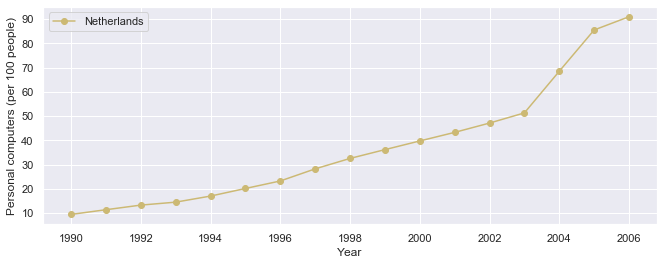

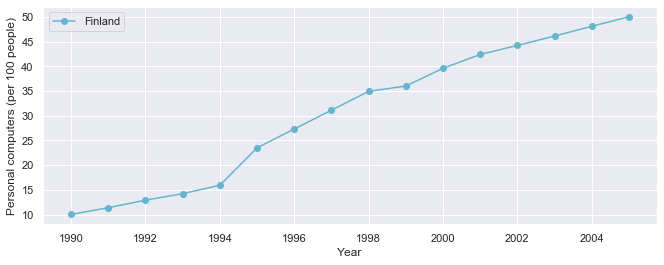

In [136]:
figs_countries_of_top_10_pc_users = plot_top_10_per_coutry(df_average_relevant_years_pc_users_countries,'1990 - 2006', 1990, 2006, 1)

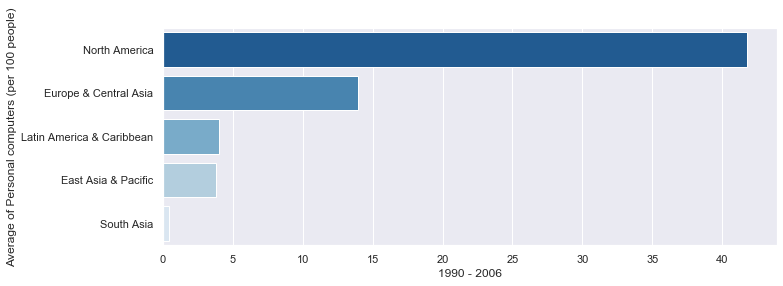

In [137]:
graph_top_ten_countries_and_geo_regions(df_average_relevant_years_pc_users_geo_regions,'Blues_r','1990 - 2006', 'Country Name')

In [138]:
df_table_mean_std_top_ten = print_table_stats(df_average_relevant_years_pc_users_geo_regions,'1990 - 2006')
df_table_mean_std_top_ten

,Mean top 10 country,Standard deviation top 10 country
Country,,
North America,44.444141,21.172083
Europe & Central Asia,15.169562,9.462203
Latin America & Caribbean,4.013894,3.197873
East Asia & Pacific,4.053468,2.670573
South Asia,0.541835,0.683510


### Internet users (per 100 people)

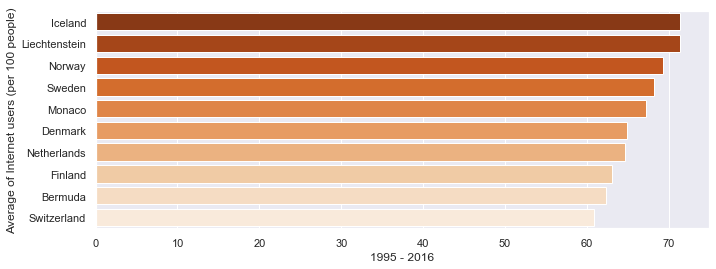

In [139]:
graph_top_ten_countries_and_geo_regions(df_average_relevant_years_internet_users_countries,'Oranges_r','1995 - 2016', 'Country Name')

In [140]:
df_table_mean_std_top_ten = print_table_stats(df_average_relevant_years_internet_users_countries,'1995 - 2016')
df_table_mean_std_top_ten

,Mean top 10 country,Standard deviation top 10 country
Country,,
Iceland,72.624538,29.800863
Liechtenstein,72.925792,18.364638
Norway,70.610154,29.922482
Sweden,69.308354,29.596093
Monaco,68.911736,18.307843
Denmark,66.306427,32.681570
Netherlands,65.884234,30.446903
Finland,64.136867,27.572996
Bermuda,63.945523,28.150209


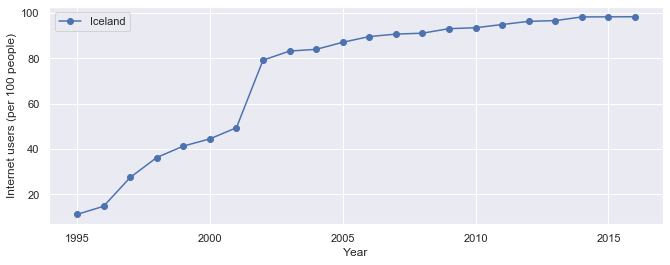

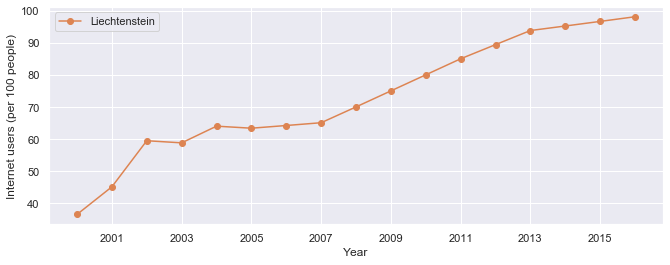

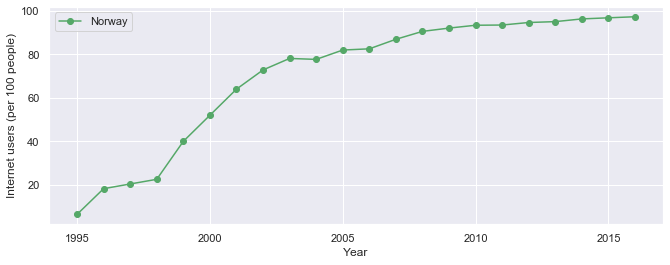

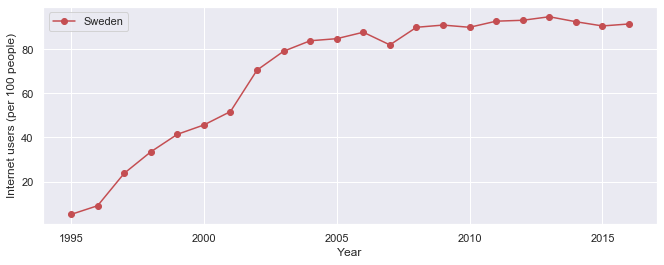

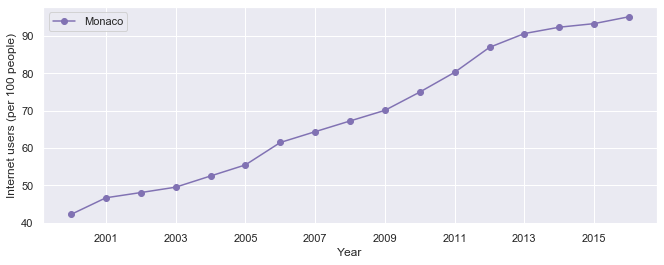

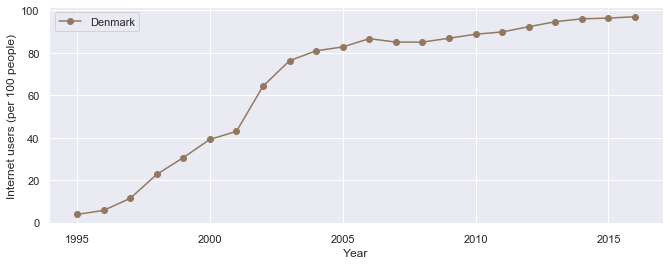

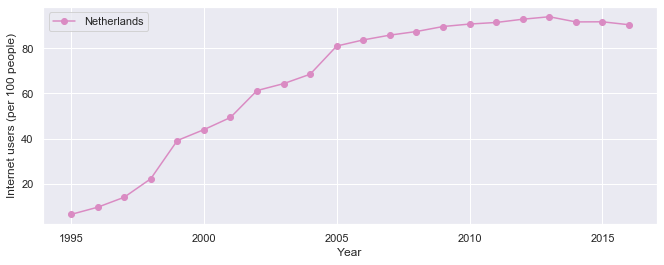

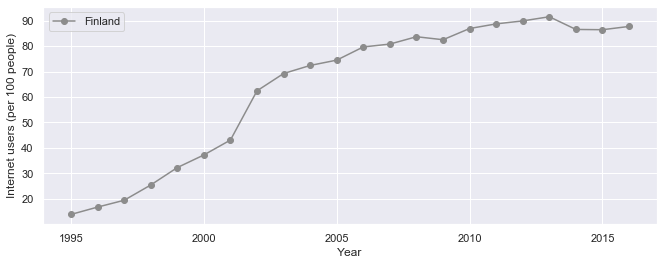

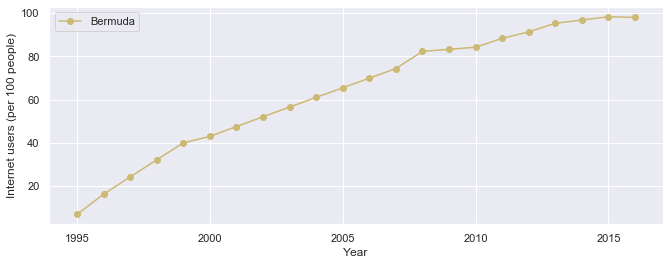

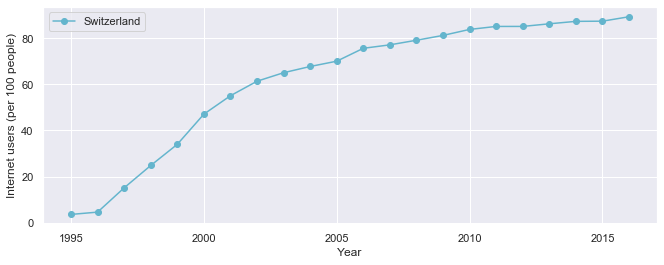

In [141]:
figs_countries_of_top_10_internet_users = plot_top_10_per_coutry(df_average_relevant_years_internet_users_countries,'1995 - 2016', 1995, 2016, 1)

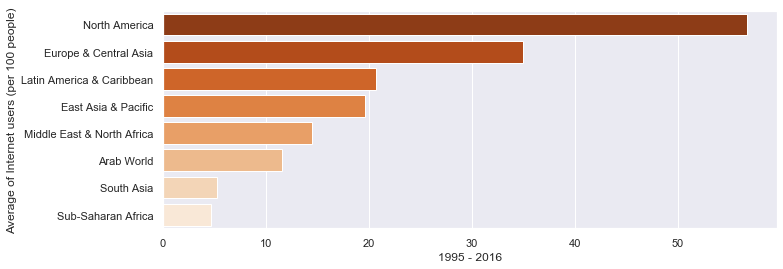

In [142]:
graph_top_ten_countries_and_geo_regions(df_average_relevant_years_internet_users_geo_regions,'Oranges_r','1995 - 2016', 'Country Name')

In [143]:
df_table_mean_std_top_ten = print_table_stats(df_average_relevant_years_internet_users_geo_regions,'1995 - 2016')
df_table_mean_std_top_ten

,Mean top 10 country,Standard deviation top 10 country
Country,,
North America,57.681379,21.911036
Europe & Central Asia,36.725208,24.882466
Latin America & Caribbean,22.272095,19.209622
East Asia & Pacific,21.141932,17.887083
Middle East & North Africa,15.960277,15.820633
Arab World,11.592177,12.728905
South Asia,6.216173,7.873298
Sub-Saharan Africa,5.388914,6.222082


### Enrolment in secondary education, both sexes (number)

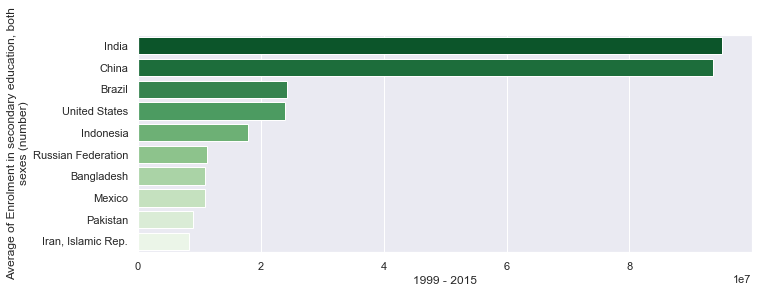

In [144]:
graph_top_ten_countries_and_geo_regions(df_average_relevant_years_secondary_enrolment_countries,'Greens_r','1999 - 2015', 'Country Name')

In [145]:
df_table_mean_std_top_ten = print_table_stats(df_average_relevant_years_secondary_enrolment_countries,'1999 - 2015')
df_table_mean_std_top_ten

,Mean top 10 country,Standard deviation top 10 country
Country,,
India,9.713101e+07,2.037191e+07
China,9.316490e+07,7.698240e+06
Brazil,2.421283e+07,1.025687e+06
United States,2.394684e+07,7.223936e+05
Indonesia,1.833100e+07,3.075603e+06
Russian Federation,1.110251e+07,2.313065e+06
Bangladesh,1.112852e+07,1.274770e+06
Mexico,1.087905e+07,1.244716e+06
Pakistan,9.192320e+06,1.894644e+06


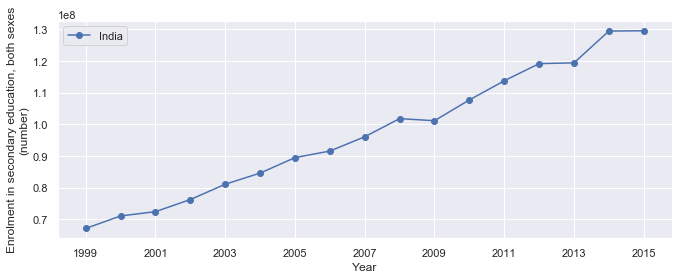

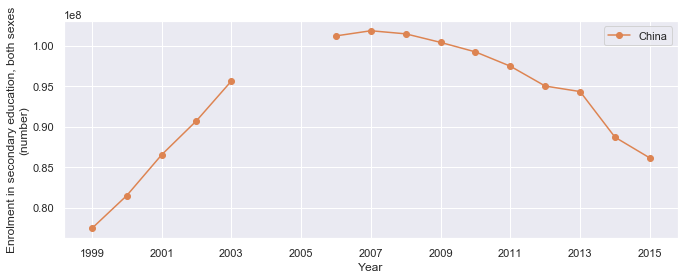

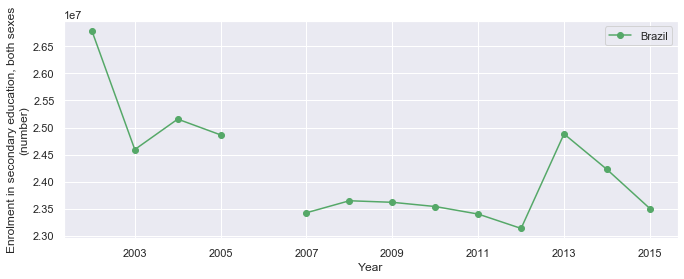

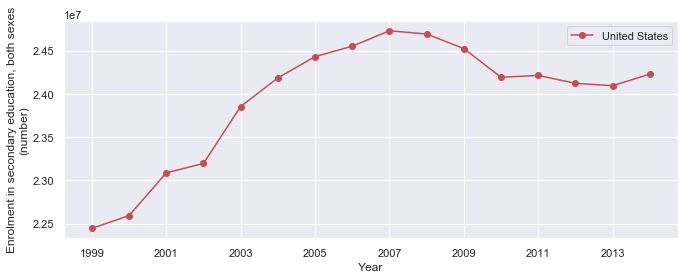

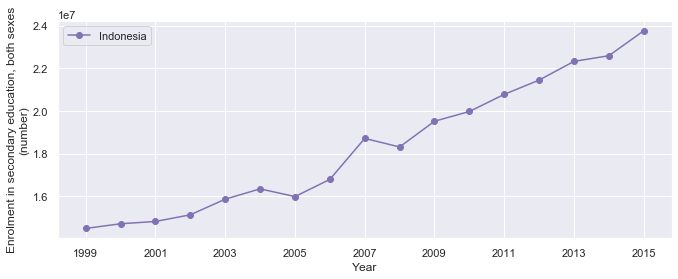

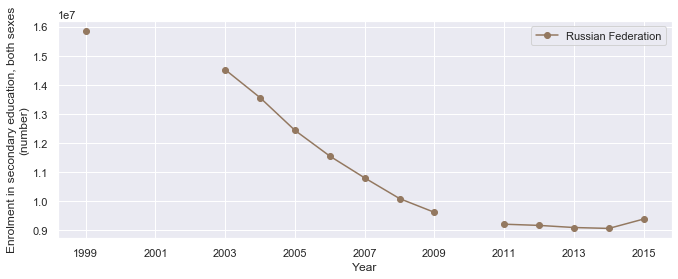

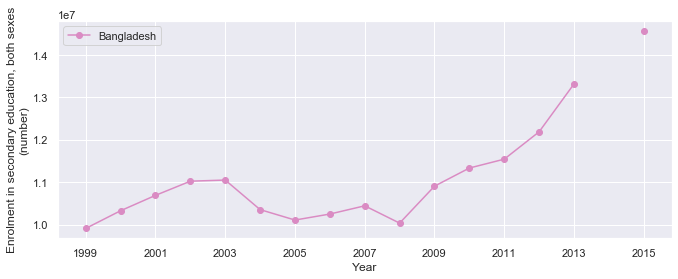

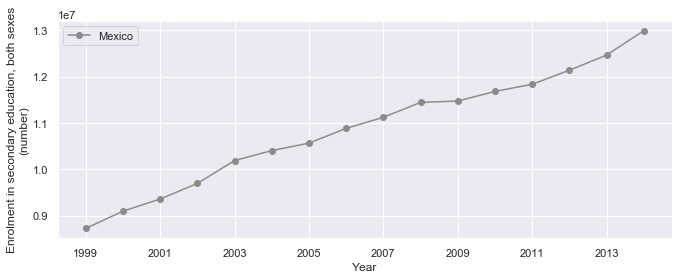

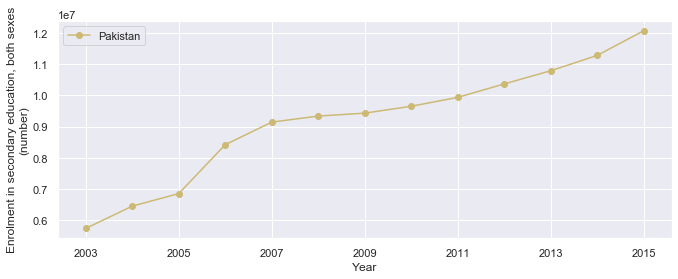

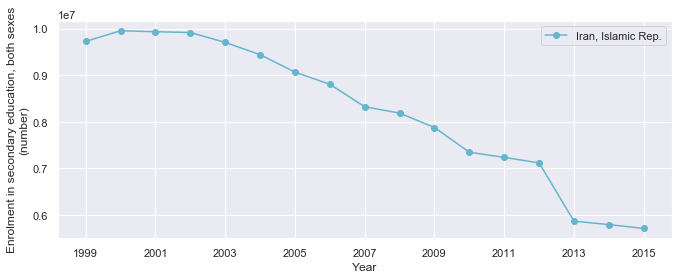

In [146]:
figs_countries_of_top_10_secondary_enrolment = plot_top_10_per_coutry(df_average_relevant_years_secondary_enrolment_countries,'1999 - 2015', 1999, 2015, 1)

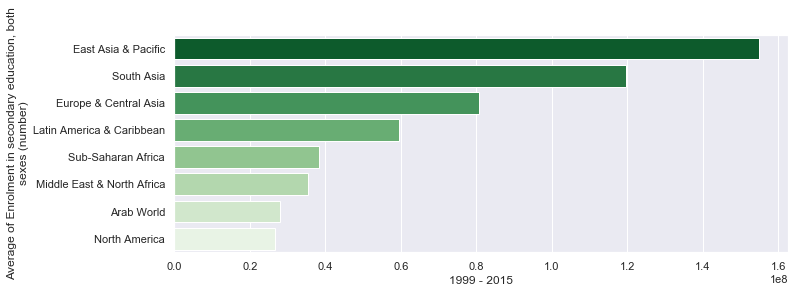

In [147]:
graph_top_ten_countries_and_geo_regions(df_average_relevant_years_secondary_enrolment_geo_regions,'Greens_r','1999 - 2015', 'Country Name')

In [148]:
df_table_mean_std_top_ten = print_table_stats(df_average_relevant_years_secondary_enrolment_geo_regions,'1999 - 2015')
df_table_mean_std_top_ten

,Mean top 10 country,Standard deviation top 10 country
Country,,
East Asia & Pacific,1.549664e+08,9.896861e+06
South Asia,1.196900e+08,2.260532e+07
Europe & Central Asia,8.068638e+07,4.516576e+06
Latin America & Caribbean,5.955585e+07,2.574362e+06
Sub-Saharan Africa,3.824453e+07,1.110534e+07
Middle East & North Africa,3.549594e+07,1.642820e+06
Arab World,2.803258e+07,2.945425e+06
North America,2.656114e+07,7.742312e+05


### Enrolment in tertiary education, all programmes, both sexes (number)

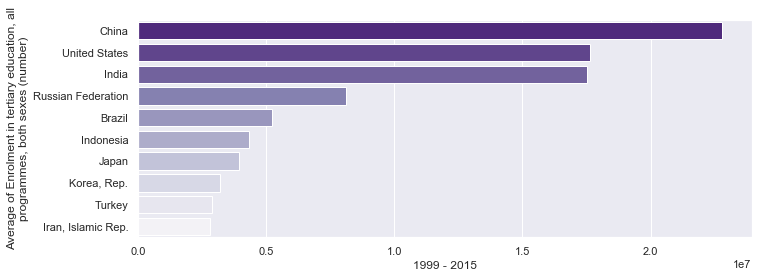

In [149]:
graph_top_ten_countries_and_geo_regions(df_average_relevant_years_tertiary_enrolment_countries,'Purples_r','1999 - 2015', 'Country Name')

In [150]:
df_table_mean_std_top_ten = print_table_stats(df_average_relevant_years_tertiary_enrolment_countries,'1999 - 2015')
df_table_mean_std_top_ten

,Mean top 10 country,Standard deviation top 10 country
Country,,
China,2.400992e+07,1.139670e+07
United States,1.773646e+07,2.522035e+06
India,1.841976e+07,8.163148e+06
Russian Federation,8.030212e+06,1.182779e+06
Brazil,5.422263e+06,1.929808e+06
Indonesia,4.374798e+06,1.215088e+06
Japan,3.948332e+06,7.557522e+04
"Korea, Rep.",3.211176e+06,1.294091e+05
Turkey,3.075755e+06,1.463067e+06


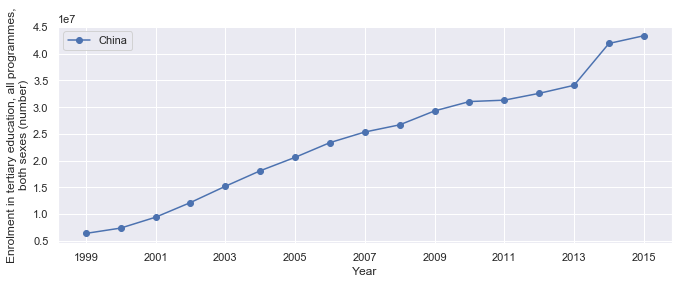

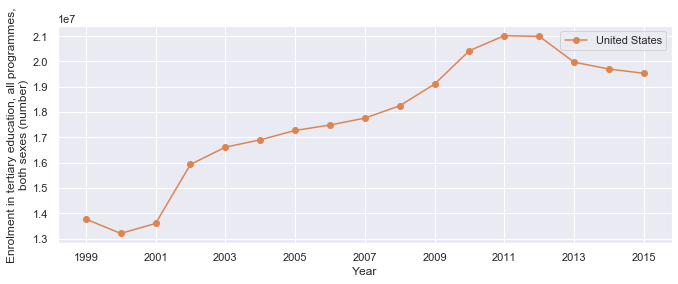

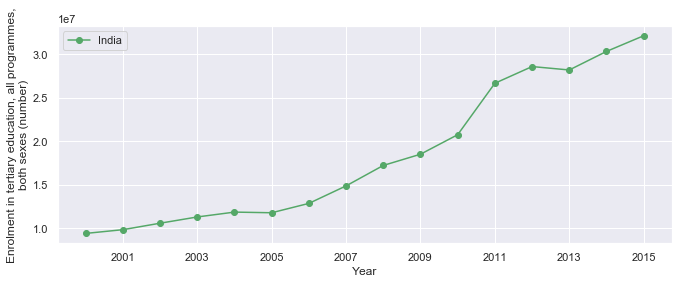

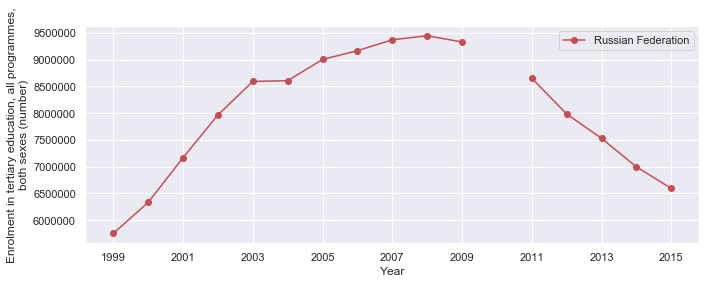

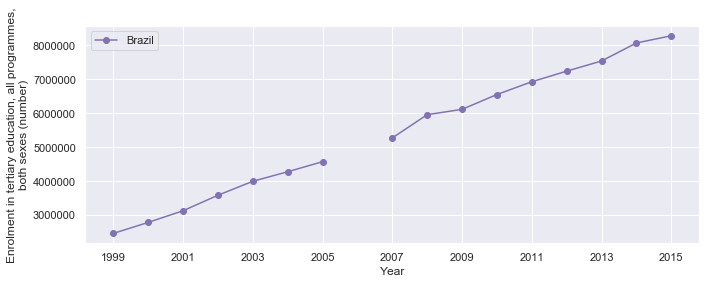

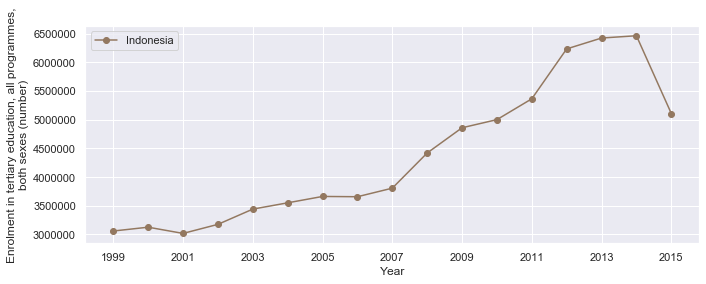

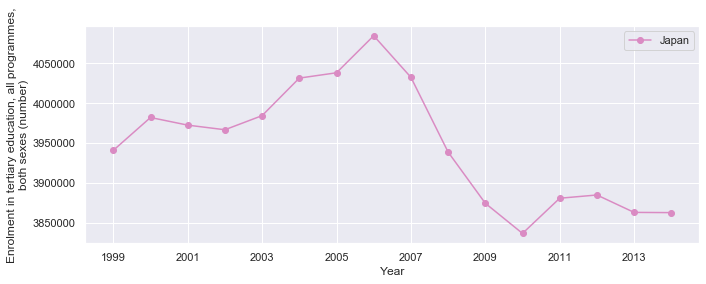

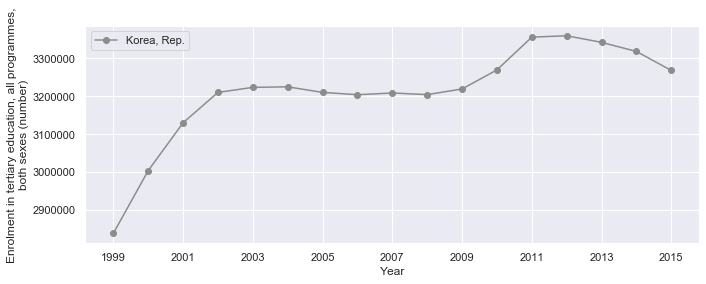

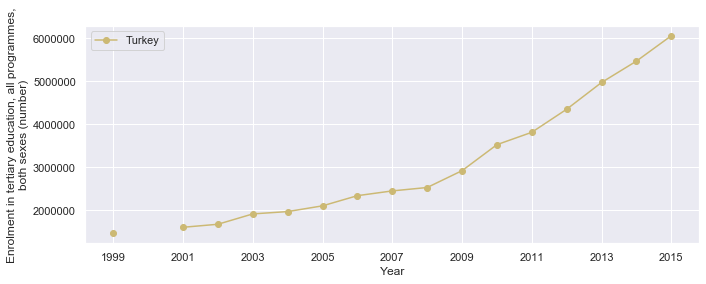

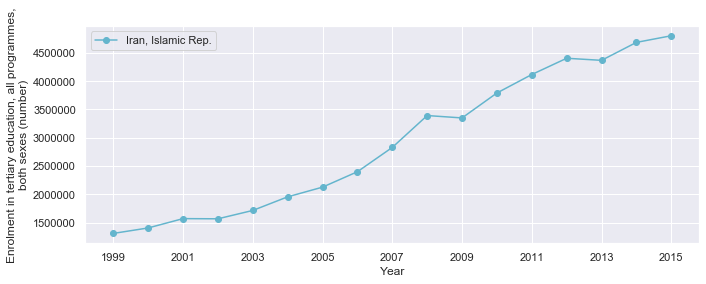

In [151]:
figs_countries_of_top_10_tertiary_enrolment = plot_top_10_per_coutry(df_average_relevant_years_tertiary_enrolment_countries,'1999 - 2015', 1999, 2015, 1)

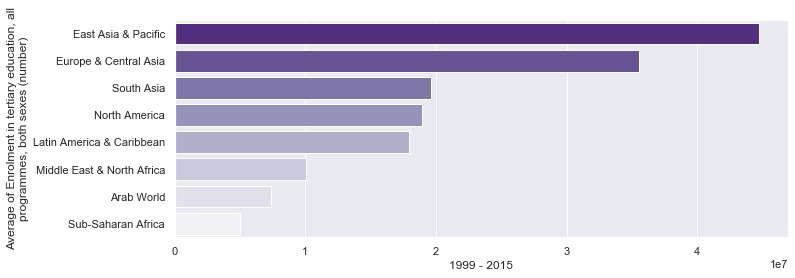

In [152]:
graph_top_ten_countries_and_geo_regions(df_average_relevant_years_tertiary_enrolment_geo_regions,'Purples_r','1999 - 2015', 'Country Name')

In [153]:
df_table_mean_std_top_ten = print_table_stats(df_average_relevant_years_tertiary_enrolment_geo_regions,'1999 - 2015')
df_table_mean_std_top_ten

,Mean top 10 country,Standard deviation top 10 country
Country,,
East Asia & Pacific,4.474047e+07,1.376660e+07
Europe & Central Asia,3.552121e+07,3.977190e+06
South Asia,1.965941e+07,8.796769e+06
North America,1.893470e+07,2.621734e+06
Latin America & Caribbean,1.792066e+07,4.630562e+06
Middle East & North Africa,1.006085e+07,2.719691e+06
Arab World,7.361873e+06,1.651123e+06
Sub-Saharan Africa,5.037613e+06,1.756842e+06


### GDP per capita, PPP (current international $)

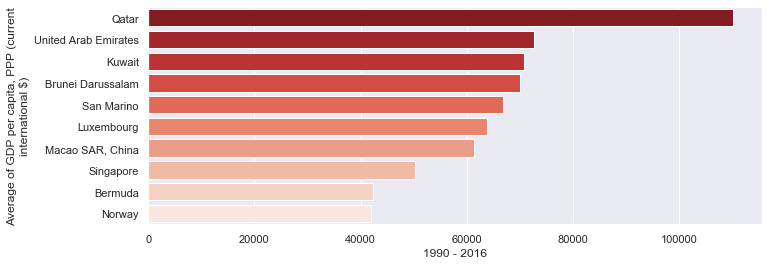

In [154]:
graph_top_ten_countries_and_geo_regions(df_average_relevant_years_gdp_countries,'Reds_r','1990 - 2016', 'Country Name')

In [155]:
df_table_mean_std_top_ten = print_table_stats(df_average_relevant_years_gdp_countries,'1990 - 2016')
df_table_mean_std_top_ten

,Mean top 10 country,Standard deviation top 10 country
Country,,
Qatar,111264.196449,16091.762916
United Arab Emirates,72691.586713,7901.955671
Kuwait,71019.249189,12016.330645
Brunei Darussalam,70403.738411,9088.472433
San Marino,66489.608408,10127.523139
Luxembourg,65286.344227,24402.422207
"Macao SAR, China",62931.680647,37518.674075
Singapore,51669.312992,21107.583450
Bermuda,42339.929991,11329.487408


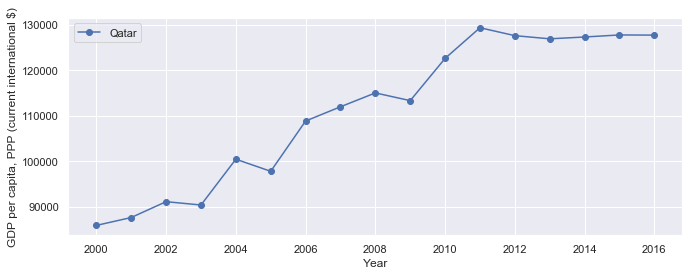

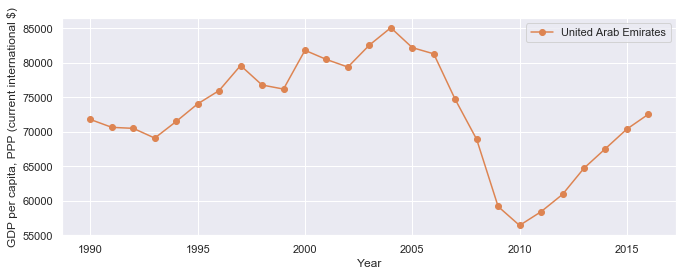

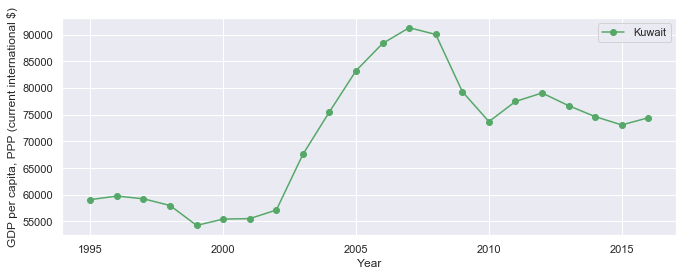

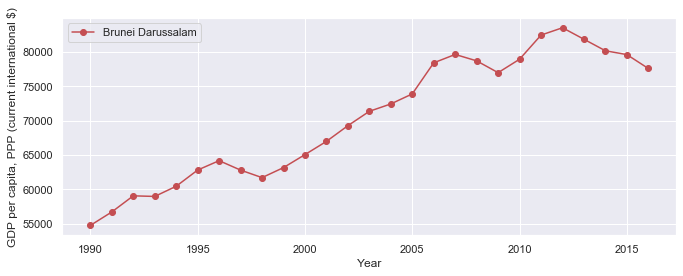

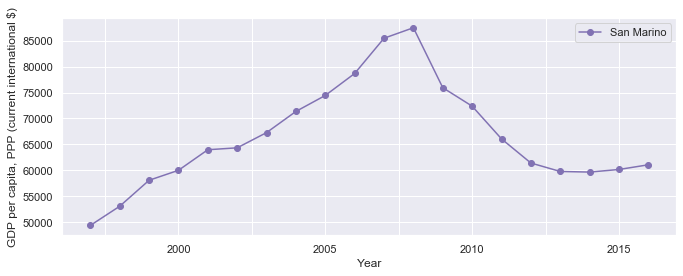

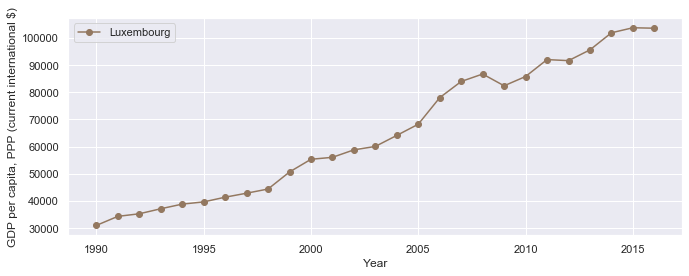

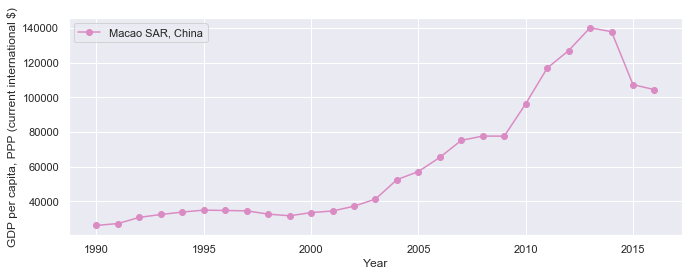

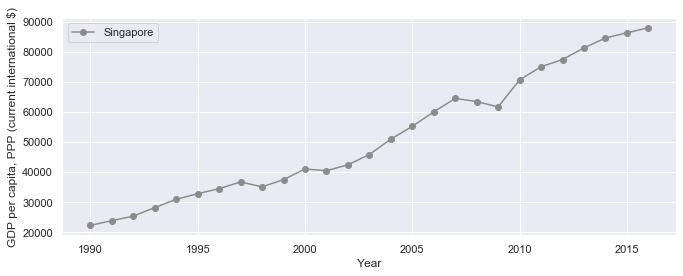

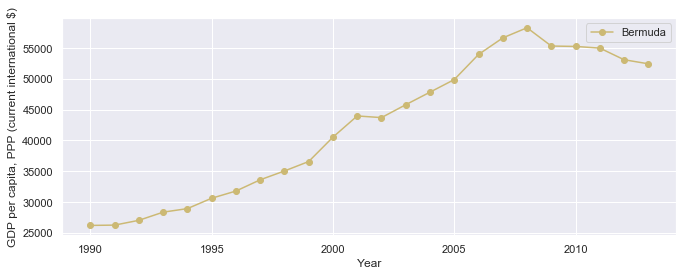

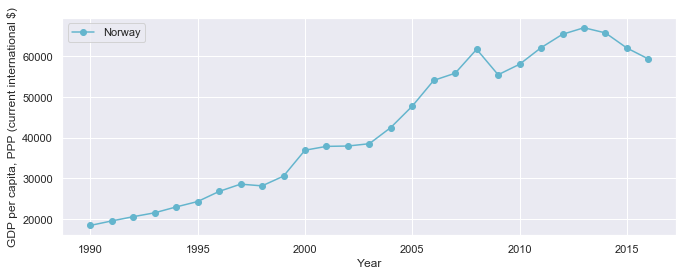

In [156]:
figs_countries_of_top_10_gdp = plot_top_10_per_coutry(df_average_relevant_years_gdp_countries,'1990 - 2016', 1990, 2016, 1)

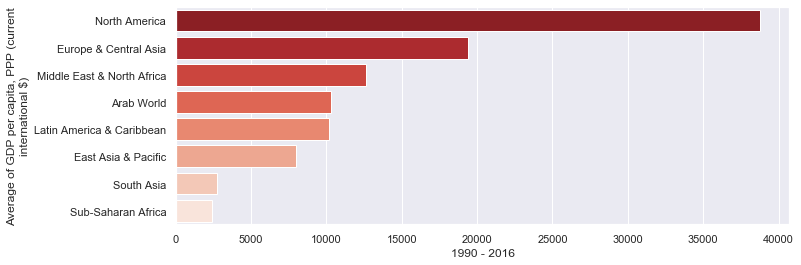

In [157]:
graph_top_ten_countries_and_geo_regions(df_average_relevant_years_gdp_geo_regions,'Reds_r','1990 - 2016', 'Country Name')

In [158]:
df_table_mean_std_top_ten = print_table_stats(df_average_relevant_years_gdp_geo_regions,'1990 - 2016')
df_table_mean_std_top_ten

,Mean top 10 country,Standard deviation top 10 country
Country,,
North America,39429.896960,10443.316993
Europe & Central Asia,19854.656893,6942.982733
Middle East & North Africa,12855.726548,3837.522738
Arab World,10300.657721,3176.896343
Latin America & Caribbean,10359.759086,3202.661893
East Asia & Pacific,8295.853561,4276.124416
South Asia,2882.244161,1492.423923
Sub-Saharan Africa,2447.902450,766.914051


### Projection: Percentage of the population age 25-29 by highest level of educational attainment. Post Secondary. Total

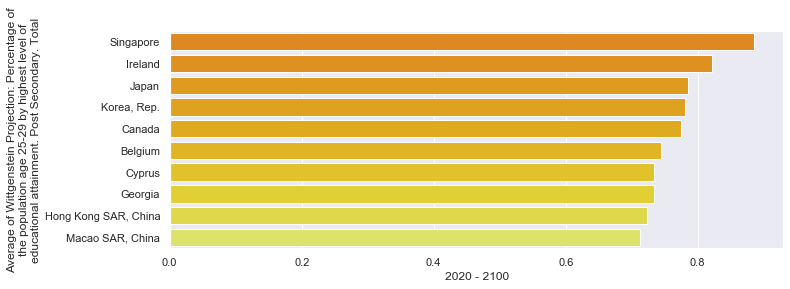

In [159]:
graph_top_ten_countries_and_geo_regions(df_average_relevant_years_projection_tertiary_ed_countries,'Wistia_r','2020 - 2100','Country Name')

In [160]:
df_table_mean_std_top_ten = print_table_stats(df_average_relevant_years_projection_tertiary_ed_countries,'2020 - 2100')
df_table_mean_std_top_ten

,Mean top 10 country,Standard deviation top 10 country
Country,,
Singapore,0.885882,0.007123
Ireland,0.825294,0.051855
Japan,0.788824,0.050730
"Korea, Rep.",0.782353,0.029054
Canada,0.777059,0.040891
Belgium,0.750000,0.073655
Cyprus,0.738235,0.069932
Georgia,0.737647,0.052504
"Hong Kong SAR, China",0.729412,0.095097
